In [3]:
import pandas as pd
import numpy as np

In [4]:
cleaned_data = pd.read_csv('dataset/used_cars_cleaned.csv')

In [5]:
cleaned_data.head()

region  price  year manufacturer                     model  condition  \
0  auburn  33590  2014          gmc  sierra 1500 crew cab slt       good   
1  auburn  22590  2010    chevrolet            silverado 1500       good   
2  auburn  39590  2020    chevrolet       silverado 1500 crew       good   
3  auburn  30990  2017       toyota      tundra double cab sr       good   
4  auburn  15000  2013         ford                 f-150 xlt  excellent   

     cylinders fuel  odometer title_status  ... drive         size    type  \
0  8 cylinders  gas   57923.0        clean  ...   4wd  unspecified  pickup   
1  8 cylinders  gas   71229.0        clean  ...   4wd    full-size  pickup   
2  8 cylinders  gas   19160.0        clean  ...   4wd  unspecified  pickup   
3  8 cylinders  gas   41124.0        clean  ...   4wd    full-size  pickup   
4  6 cylinders  gas  128000.0        clean  ...   rwd    full-size   truck   

  paint_color                                        description state  \
0       white  Carvana is the safer way to buy a car During t...    al   
1        blue  Carvana is the safer way to buy a car During t...    al   
2         red  Carvana is the safer way to buy a car During t...    al   
3         red  Carvana is the safer way to buy a car During t...    al   
4       black  2013 F-150 XLT V6 4 Door. Good condition. Leve...    al   

      lat     long  is_condition_imputed  is_title_status_imputed  
0  32.590 -85.4800                 False                    False  
1  32.590 -85.4800                 False                    False  
2  32.590 -85.4800                 False                    False  
3  32.590 -85.4800                 False                    False  
4  32.592 -85.5189                 False                    False  

[5 rows x 21 columns]

In [6]:
cleaned_data.shape

(246680, 21)

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246680 entries, 0 to 246679
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   246680 non-null  object 
 1   price                    246680 non-null  int64  
 2   year                     246680 non-null  int64  
 3   manufacturer             246680 non-null  object 
 4   model                    246680 non-null  object 
 5   condition                246680 non-null  object 
 6   cylinders                246680 non-null  object 
 7   fuel                     246680 non-null  object 
 8   odometer                 246680 non-null  float64
 9   title_status             246680 non-null  object 
 10  transmission             246680 non-null  object 
 11  drive                    246680 non-null  object 
 12  size                     246680 non-null  object 
 13  type                     246680 non-null  object 
 14  pain

In [8]:
cleaned_data.describe()

price           year       odometer            lat  \
count  246680.000000  246680.000000  246680.000000  246490.000000   
mean    26601.675823    2013.666422   67549.955594      38.416280   
std     14307.718128       8.855929   49938.836949       6.027038   
min     10020.000000    1910.000000       0.000000     -38.115380   
25%     15999.000000    2013.000000   26852.750000      34.183005   
50%     23990.000000    2016.000000   57899.000000      38.946200   
75%     33590.000000    2018.000000   99575.000000      42.364188   
max    470000.000000    2022.000000  241292.000000      65.735076   

                long  
count  246490.000000  
mean      -94.962267  
std        18.645774  
min      -159.719900  
25%      -111.855205  
50%       -89.010000  
75%       -81.338867  
max       139.691700

# Validate Imputation

In [9]:
from scipy.stats import mannwhitneyu

In [10]:
# Separate original vs imputed within the 'good' condition
orig_good = cleaned_data.loc[~cleaned_data['is_condition_imputed'] & (cleaned_data['condition']=='good'), 'price']
imp_good  = cleaned_data.loc[ cleaned_data['is_condition_imputed'] & (cleaned_data['condition']=='good'), 'price']

# Compute means/medians
print("Original good mean:",  orig_good.mean(), "median:", orig_good.median())
print("Imputed good mean:",   imp_good.mean(),  "median:", imp_good.median())

# Mann–Whitney U test
u_stat, p_val = mannwhitneyu(orig_good, imp_good, alternative='two-sided')
print("Mann-Whitney p-value:", p_val)


Original good mean: 27551.76095215196 median: 26990.0
Imputed good mean: 27818.507900075823 median: 23697.0
Mann-Whitney p-value: 7.691221148694658e-293


In [11]:
# Separate original vs imputed within the 'good' condition
orig_good = cleaned_data.loc[~cleaned_data['is_title_status_imputed'] & (cleaned_data['title_status']=='clean'), 'price']
imp_good  = cleaned_data.loc[ cleaned_data['is_title_status_imputed'] & (cleaned_data['title_status']=='clean'), 'price']

# Compute means/medians
print("Original clean mean:",  orig_good.mean(), "median:", orig_good.median())
print("Imputed clean mean:",   imp_good.mean(),  "median:", imp_good.median())

# Mann–Whitney U test
u_stat, p_val = mannwhitneyu(orig_good, imp_good, alternative='two-sided')
print("Mann-Whitney p-value:", p_val)

Original clean mean: 26779.33884758836 median: 23995.0
Imputed clean mean: 24671.196904761906 median: 18999.0
Mann-Whitney p-value: 4.146455090007592e-65


The imputed “clean” and “good” groups do not mirror the originals (both mean & median shift substantially > 5%, and p ≪ 0.001).

# Exploratory Data Analysis

In [12]:
excluded_cols = ['description', 'lat', 'long']

In [13]:
visualize_data = cleaned_data.drop(columns=excluded_cols)

In [14]:
visualize_data = visualize_data[(visualize_data.is_condition_imputed == False) & (visualize_data.is_title_status_imputed == False)]

In [15]:
visualize_data.head()

region  price  year manufacturer                     model  condition  \
0  auburn  33590  2014          gmc  sierra 1500 crew cab slt       good   
1  auburn  22590  2010    chevrolet            silverado 1500       good   
2  auburn  39590  2020    chevrolet       silverado 1500 crew       good   
3  auburn  30990  2017       toyota      tundra double cab sr       good   
4  auburn  15000  2013         ford                 f-150 xlt  excellent   

     cylinders fuel  odometer title_status transmission drive         size  \
0  8 cylinders  gas   57923.0        clean        other   4wd  unspecified   
1  8 cylinders  gas   71229.0        clean        other   4wd    full-size   
2  8 cylinders  gas   19160.0        clean        other   4wd  unspecified   
3  8 cylinders  gas   41124.0        clean        other   4wd    full-size   
4  6 cylinders  gas  128000.0        clean    automatic   rwd    full-size   

     type paint_color state  is_condition_imputed  is_title_status_imputed  
0  pickup       white    al                 False                    False  
1  pickup        blue    al                 False                    False  
2  pickup         red    al                 False                    False  
3  pickup         red    al                 False                    False  
4   truck       black    al                 False                    False

In [16]:
visualize_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146324 entries, 0 to 246679
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   146324 non-null  object 
 1   price                    146324 non-null  int64  
 2   year                     146324 non-null  int64  
 3   manufacturer             146324 non-null  object 
 4   model                    146324 non-null  object 
 5   condition                146324 non-null  object 
 6   cylinders                146324 non-null  object 
 7   fuel                     146324 non-null  object 
 8   odometer                 146324 non-null  float64
 9   title_status             146324 non-null  object 
 10  transmission             146324 non-null  object 
 11  drive                    146324 non-null  object 
 12  size                     146324 non-null  object 
 13  type                     146324 non-null  object 
 14  paint_col

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
num_cols = visualize_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = visualize_data.select_dtypes(include=['object']).columns

In [19]:
low_cardinal_cat_cols = [col for col in cat_cols if visualize_data[col].nunique() < 20]
high_cardinal_cat_cols = [col for col in cat_cols if visualize_data[col].nunique() >= 20]

In [20]:
print("Numerical Columns:", num_cols)
print("Categorical Columns:", low_cardinal_cat_cols, high_cardinal_cat_cols)

Numerical Columns: Index(['price', 'year', 'odometer'], dtype='object')
Categorical Columns: ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'] ['region', 'manufacturer', 'model', 'state']


For now let's bin the classes that are below top-20 for the high cardinality features

In [21]:
k = 10  # Number of top categories to display

for col in high_cardinal_cat_cols:
    map = cleaned_data[col].value_counts().head(k).index
    visualize_data[col] = visualize_data[col].apply(lambda x: x if x in map else 'other')

## Univariate Analysis

### Numerical

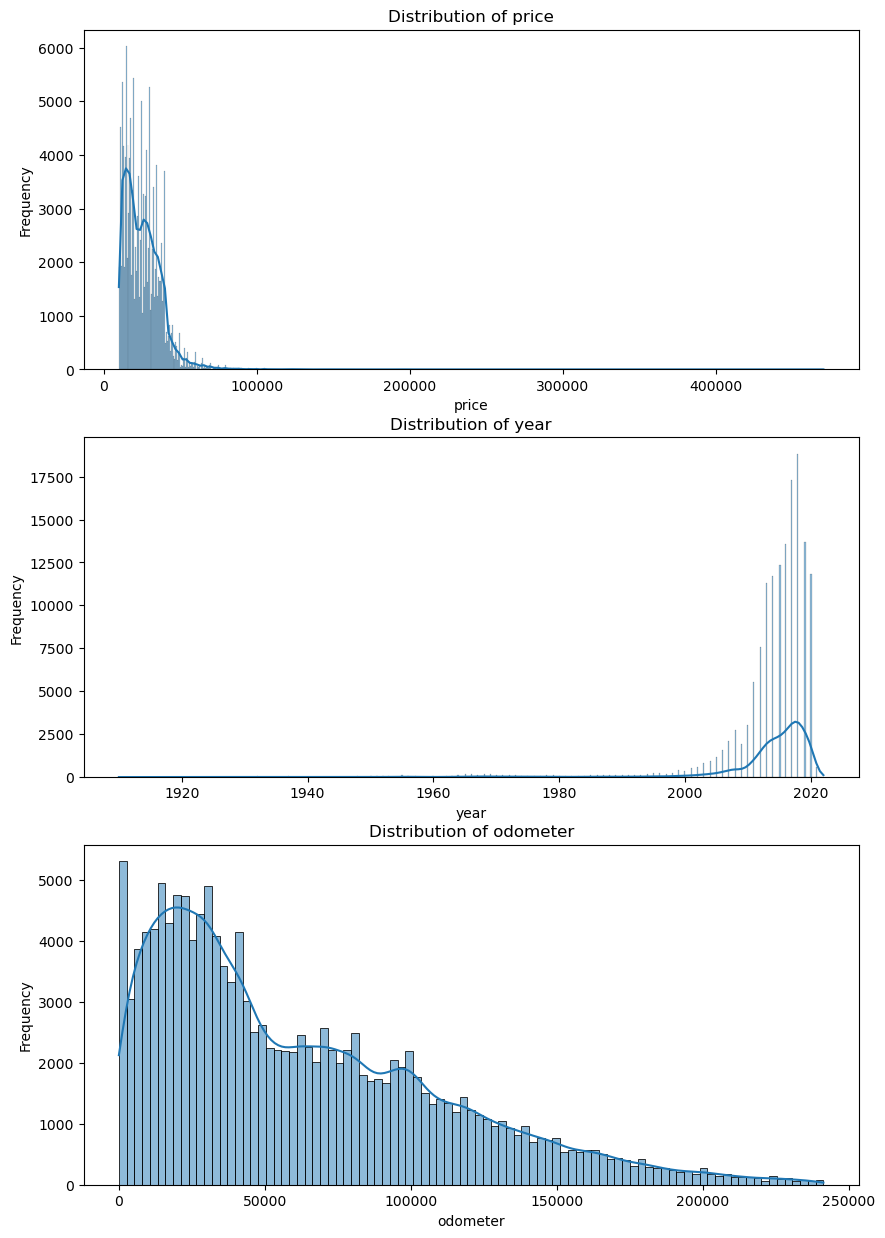

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [22]:
fig, axes = plt.subplots(len(num_cols), 1, figsize=(10, 5 * len(num_cols)), sharex=False, sharey=False)

for i, col in enumerate(num_cols):
    ax = axes[i]
    plt.figure(figsize=(10, 5))
    sns.histplot(visualize_data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    
plt.suptitle('Distribution of Numerical Columns', fontsize=16)
plt.tight_layout()
plt.show()

*Summary of Numerical Features*

Price: The distribution of price is heavily right skewed, almost 90% of the used cars are priced below 100,000 <br>

Year: The distribution of year is heavily left skewed, almost 90% of the used cars are produced after the 2000s <br> 

Odometer: The distribution of odometer is right skewed, most of the use cars have a mileage below 150,000 <br> 

### Categorical

Column: condition
           Count  Frequency
condition                  
good       83180   0.568465
excellent  49247   0.336561
like new   12822   0.087627
new          746   0.005098
fair         289   0.001975
salvage       40   0.000273
Column: cylinders
              Count  Frequency
cylinders                     
6 cylinders   47372   0.323747
8 cylinders   39707   0.271364
unspecified   33597   0.229607
4 cylinders   24020   0.164156
10 cylinders    677   0.004627
other           373   0.002549
5 cylinders     252   0.001722
3 cylinders     211   0.001442
12 cylinders    112   0.000765
0 cylinders       3   0.000021
Column: fuel
              Count  Frequency
fuel                          
gas          113962   0.778833
other         19941   0.136280
diesel         9553   0.065287
hybrid         1891   0.012923
electric        969   0.006622
unspecified       8   0.000055
Column: title_status
               Count  Frequency
title_status                   
clean         141927  

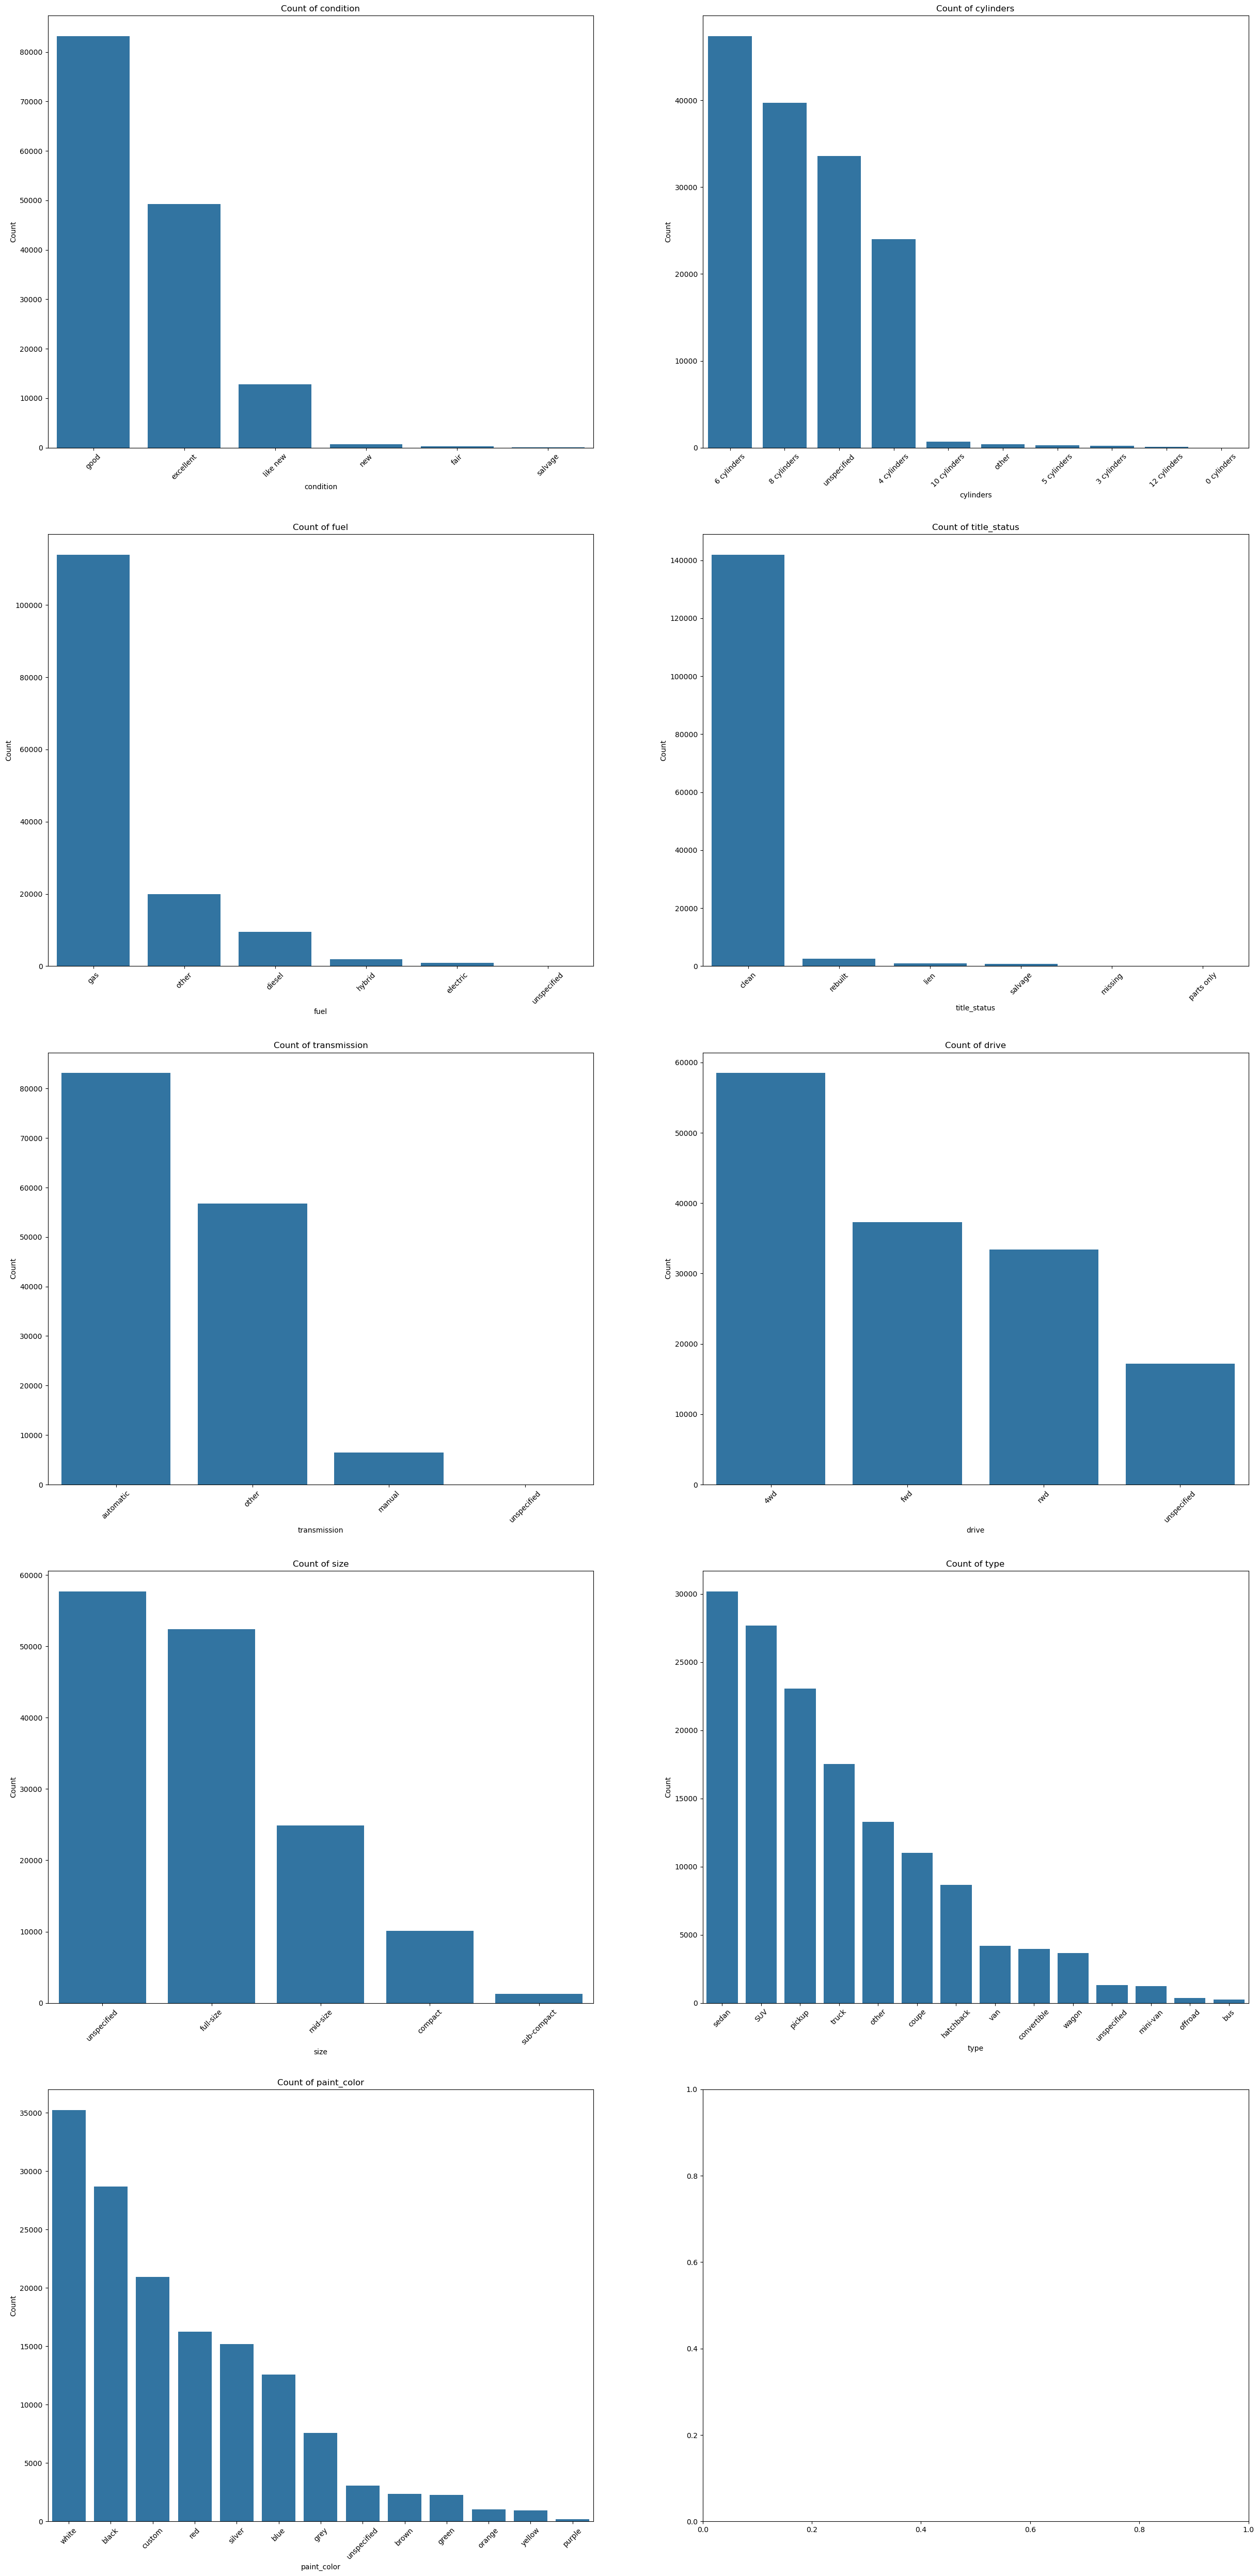

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [23]:
fig, axes = plt.subplots(5, 2, figsize=(15 * 2, 7 * len(low_cardinal_cat_cols)), sharex=False, sharey=False)

for i, col in enumerate(low_cardinal_cat_cols):
    ax = axes[i // 2, i % 2]
    plt.figure(figsize=(10, 5))
    sns.countplot(data=visualize_data, x=col, order=visualize_data[col].value_counts().index, ax= ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    print(f"Column: {col}")
    print(pd.concat([visualize_data[col].value_counts(), visualize_data[col].value_counts(normalize=True)], axis=1, keys=['Count', 'Frequency']))
    print("=" * 20)

plt.suptitle('Count of Low Cardinality Categorical Columns', fontsize=16)
plt.tight_layout()
plt.show()

*Summary of Low-Cardinality Categorical Features*

We observe across all features, there are imbalance class representations, Based on intuition and domain knowledge, we further differentiate these categorical classes as ordinal (title_status, condition) and nominal categories (cylinders, fuel, transmission, drive, size, type, paint_color), we'll further confirm our hypothesis later. Based on this we also might group some of the rare classes together

Column: region
                         Count  Frequency
region                                   
other                   136601   0.933552
ft myers / SW florida     1314   0.008980
nashville                 1240   0.008474
jacksonville              1214   0.008297
grand rapids              1108   0.007572
sarasota-bradenton        1033   0.007060
las vegas                  976   0.006670
colorado springs           856   0.005850
anchorage / mat-su         833   0.005693
omaha / council bluffs     633   0.004326
hawaii                     516   0.003526
Column: manufacturer
               Count  Frequency
manufacturer                   
other          52866   0.361294
ford           22103   0.151055
chevrolet      19250   0.131557
toyota         11572   0.079085
jeep            6690   0.045720
gmc             6655   0.045481
bmw             6616   0.045215
ram             6114   0.041784
honda           5185   0.035435
nissan          4970   0.033966
mercedes-benz   4303   0.029407
Co

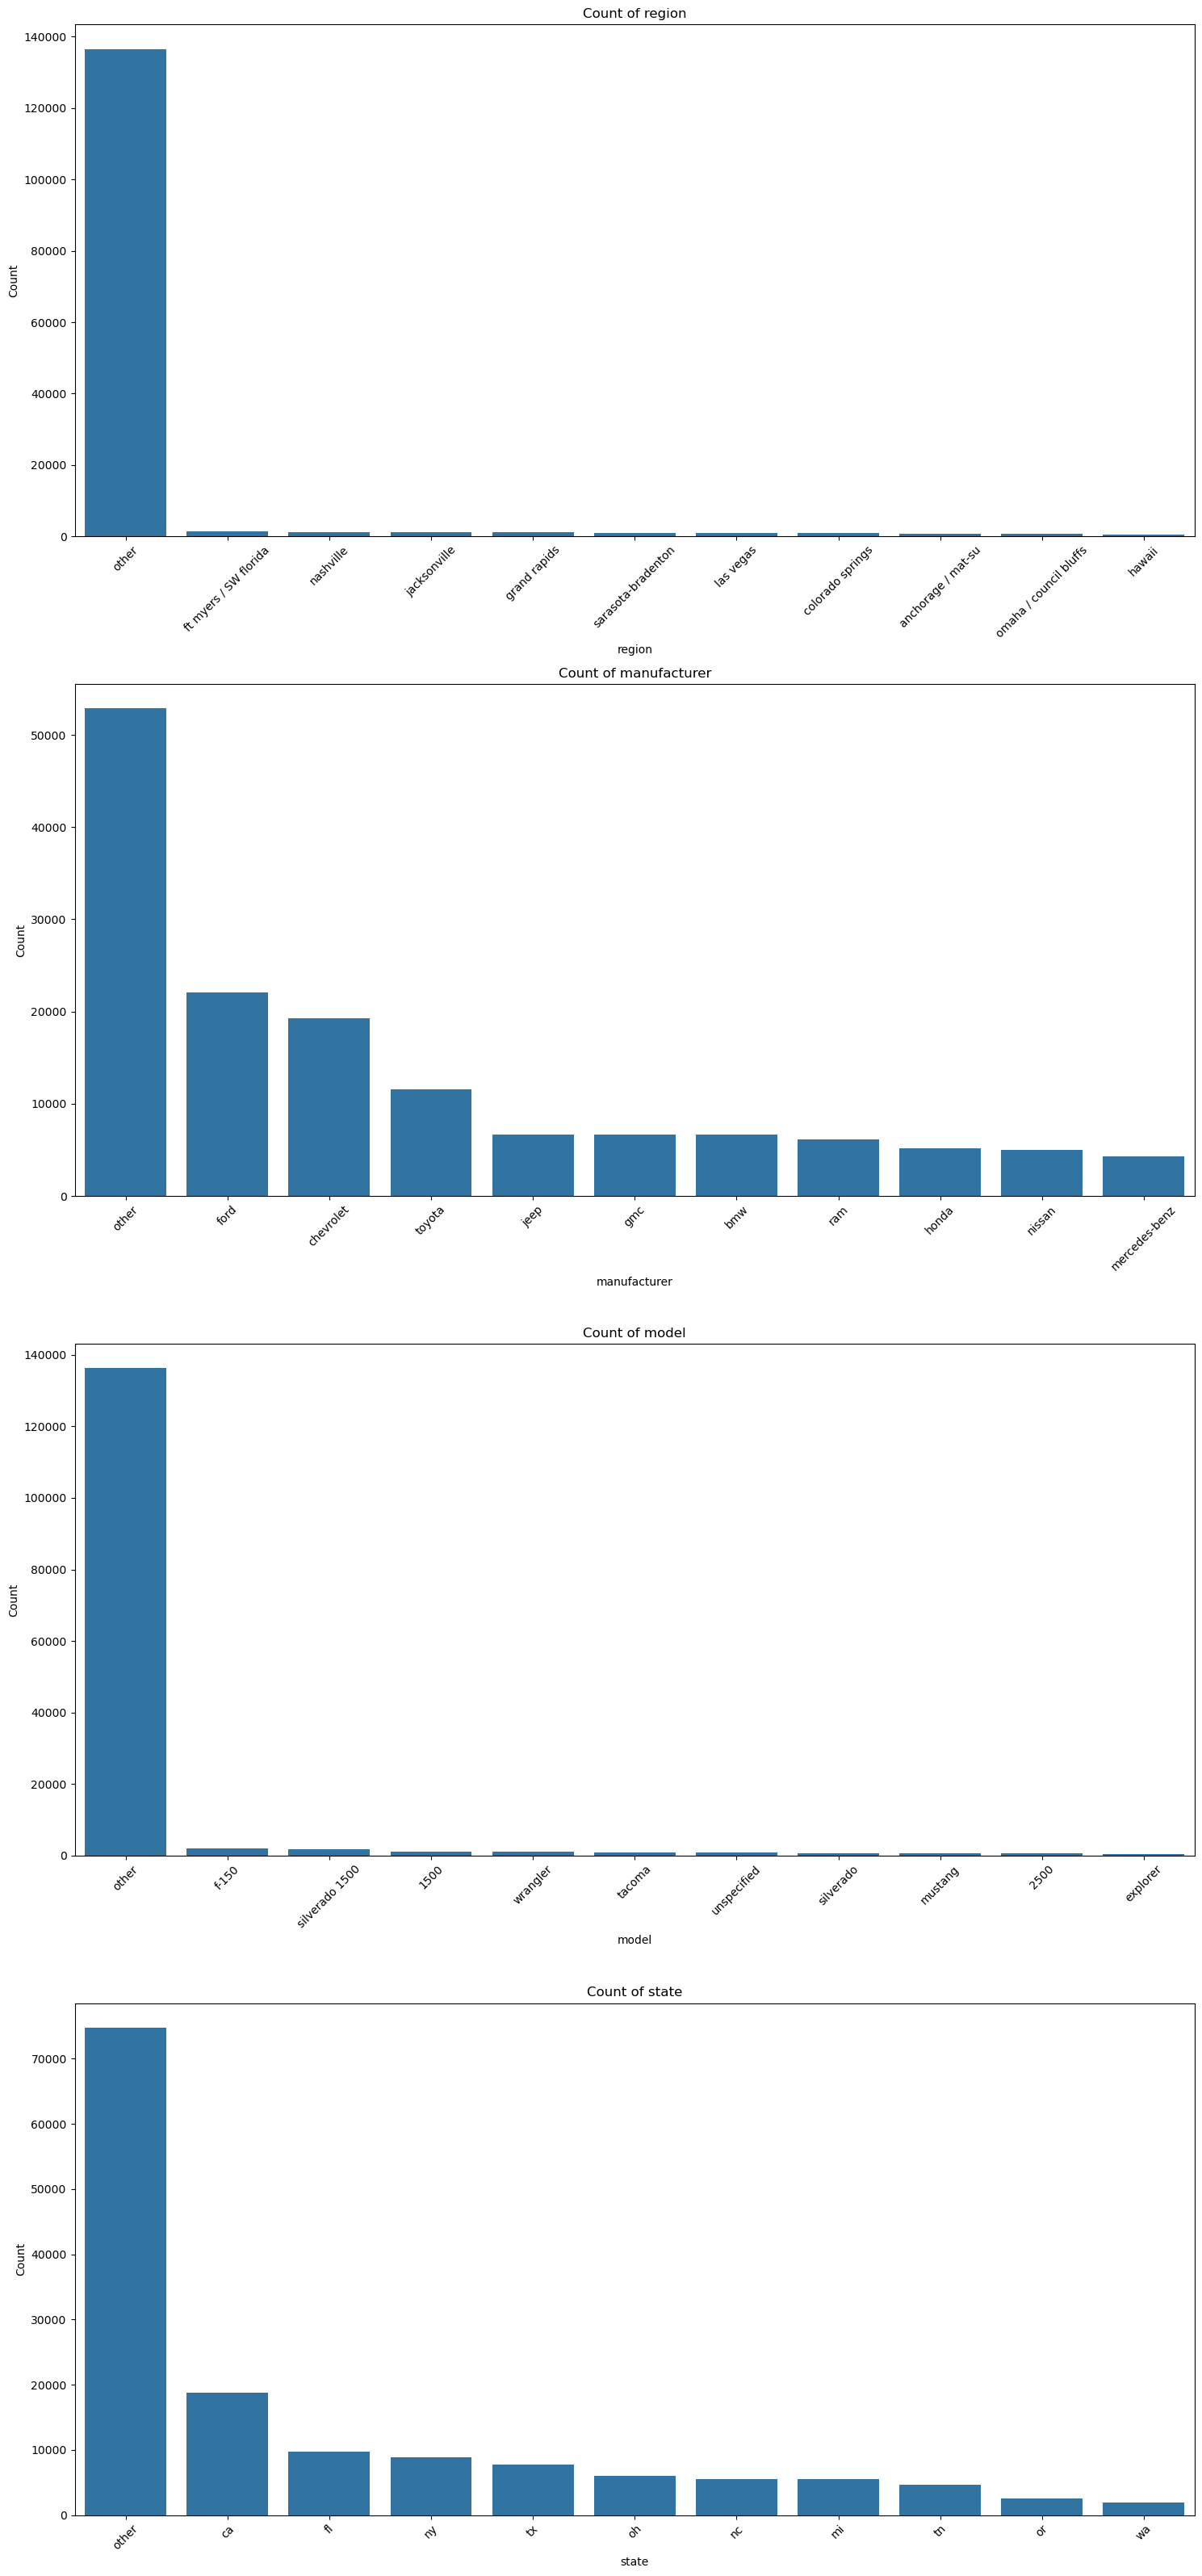

In [24]:
fig, axes = plt.subplots(len(high_cardinal_cat_cols), 1, sharex=False, sharey=False, figsize=(15, 8 * len(high_cardinal_cat_cols)))

for i, col in enumerate(high_cardinal_cat_cols):
    ax = axes[i]
    sns.countplot(data=visualize_data, x=col, order=visualize_data[col].value_counts().index, ax=ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    print(f"Column: {col}")
    print(pd.concat([visualize_data[col].value_counts(), visualize_data[col].value_counts(normalize=True)], axis=1, keys=['Count', 'Frequency']))
    print("=" * 20)

# plt.suptitle('Count of High Cardinality Categorical Columns', fontsize=16)
plt.tight_layout()
plt.show()

*Summary of High-Cardinality Categorical Features*

Region and Model is relatively uniformly distributed, While Manufacturer and State are long-tailed

## Bivariate Analysis

I'll plot every pair, but for simplicity i will be focusing on my target variable which is predicting the price

I'll also separate the nominal and ordinal categories, while giving an encoding for the ordinal features

In [25]:
ordinal_cats = ['condition', 'title_status']
nominal_cats = [col for col in cat_cols if col not in ordinal_cats]

In [26]:
condition_mapping = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}

title_status_mapping = {
    'clean': 3,
    'rebuilt': 2,
    'salvage': 1,
    'lien': 0,
    'missing': -1,
    'parts only': -2,
    'unspecified': -3
}

In [27]:
visualize_data['condition'] = visualize_data['condition'].map(condition_mapping)
visualize_data['title_status'] = visualize_data['title_status'].map(title_status_mapping)

### Numerical - Numerical

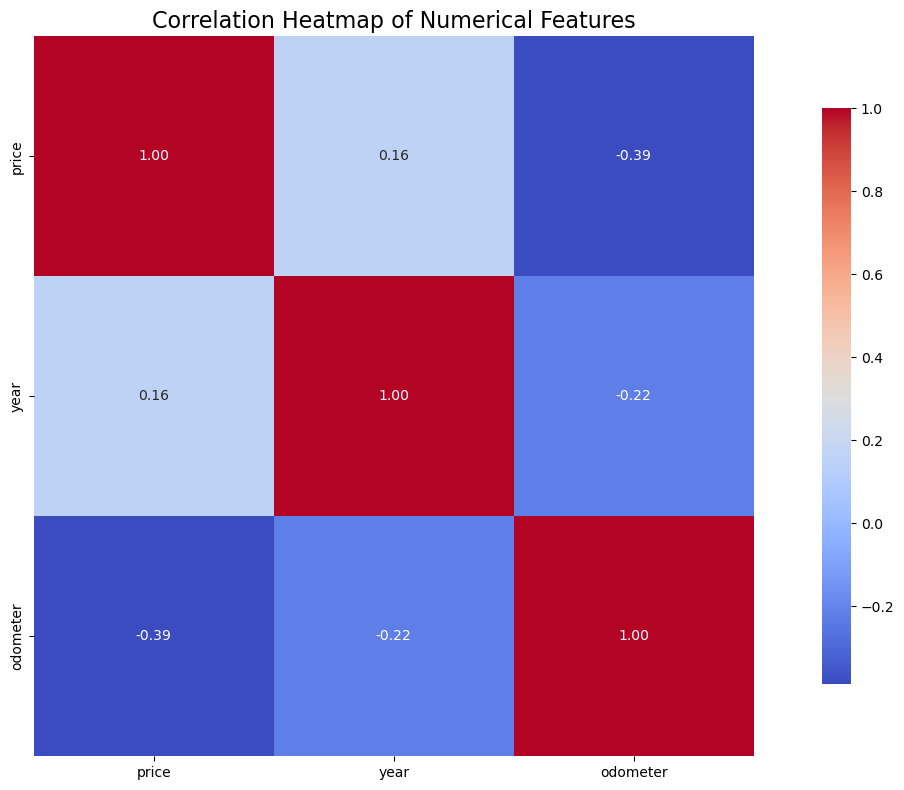

In [28]:
plt.figure(figsize=(14, 8))
sns.heatmap(visualize_data[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

Year: There isn't a clear trend or correlation between year and price
Odometer: There is a moderate trend where Odometer and Price is negatively correlated (as odometer increases, price decreases)

### Numerical - Categorical

#### Nominal

Numerical Column: price


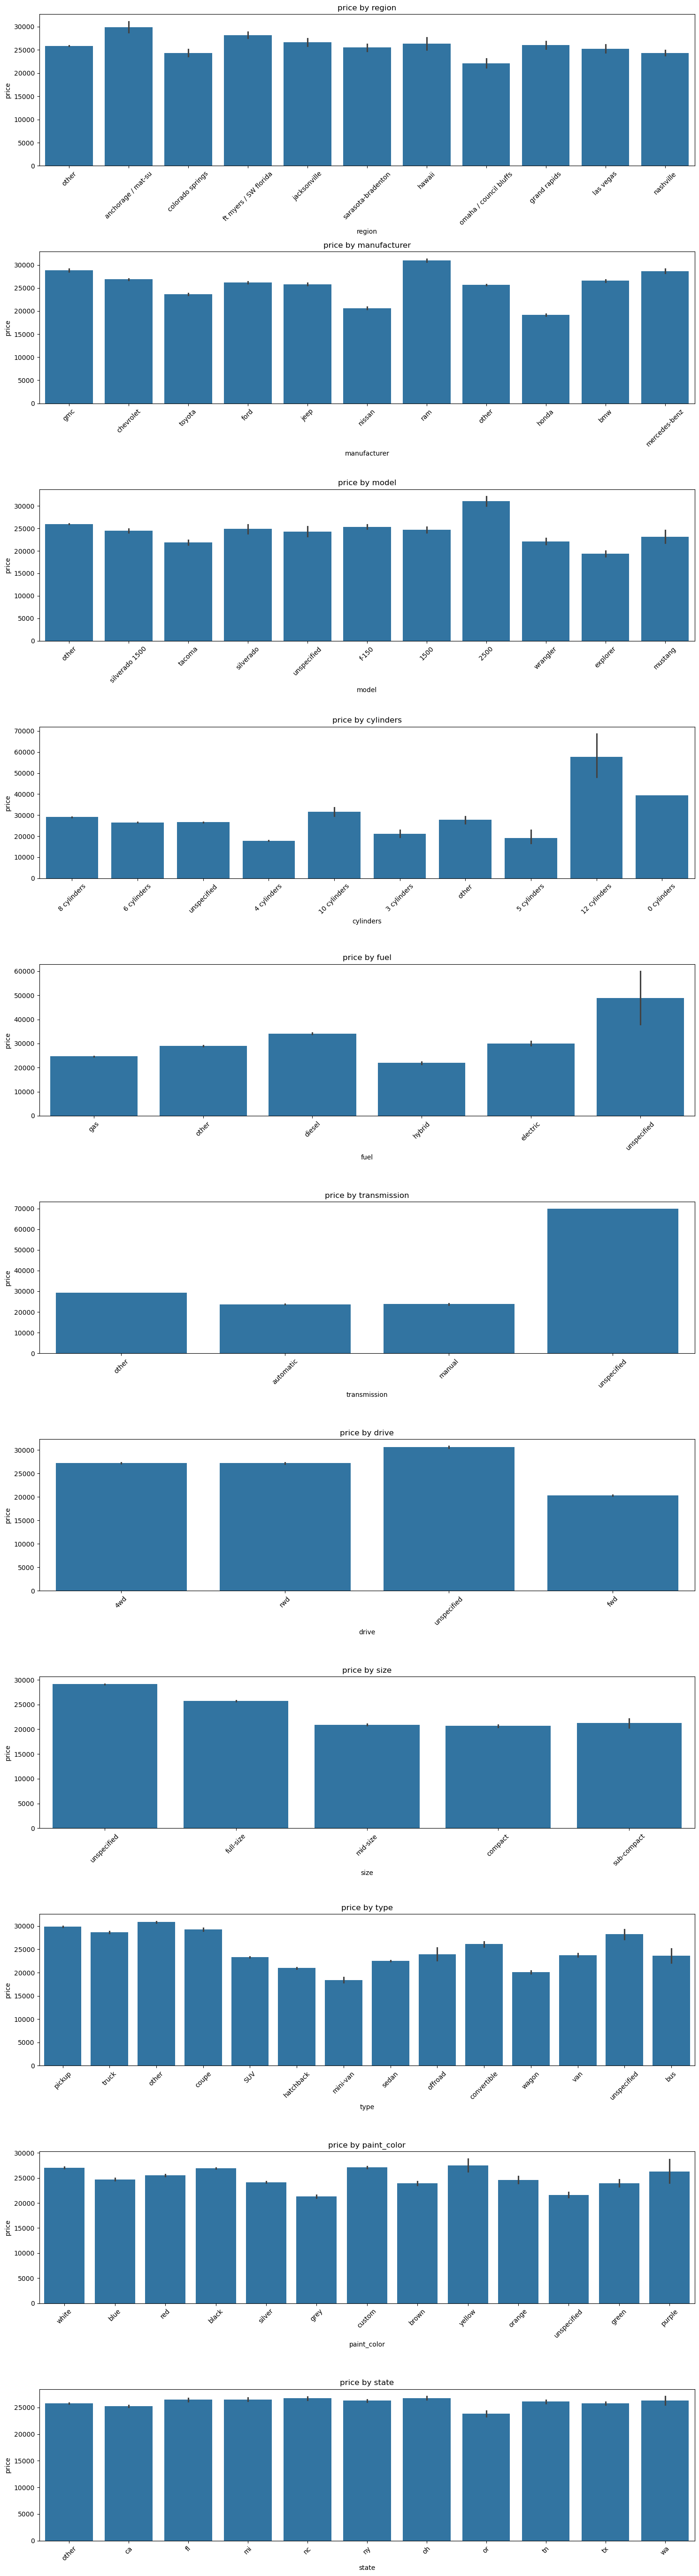

Numerical Column: year


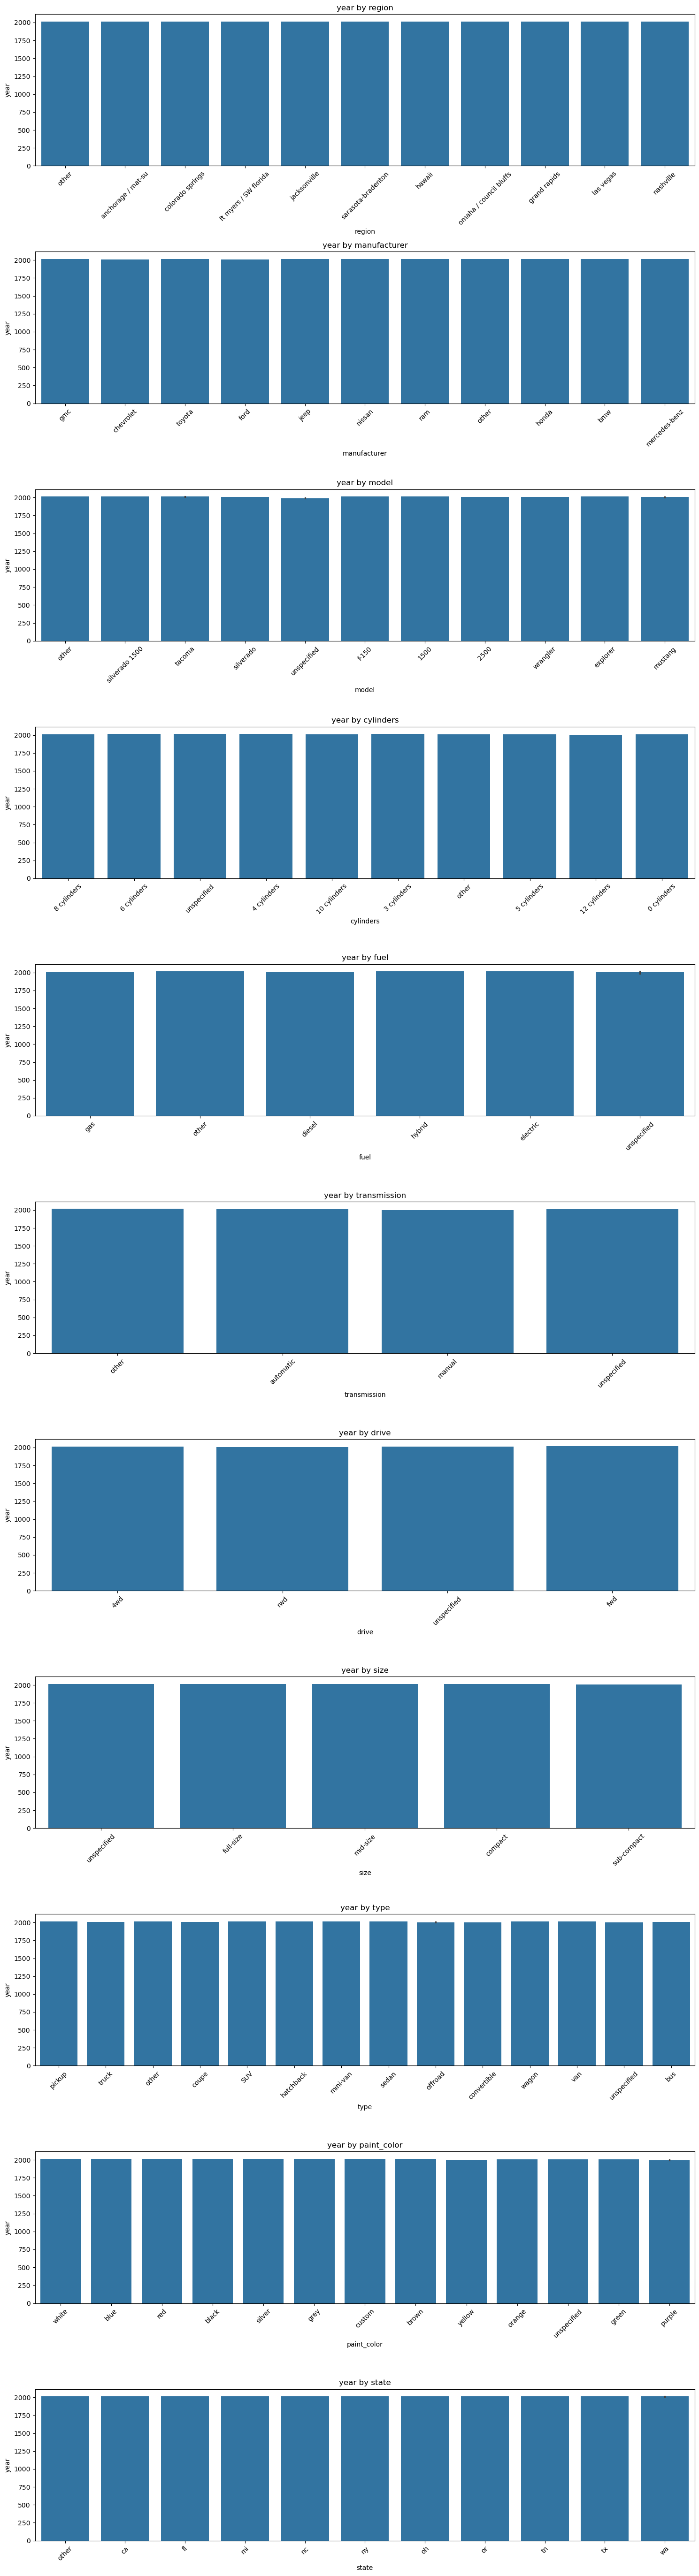

Numerical Column: odometer


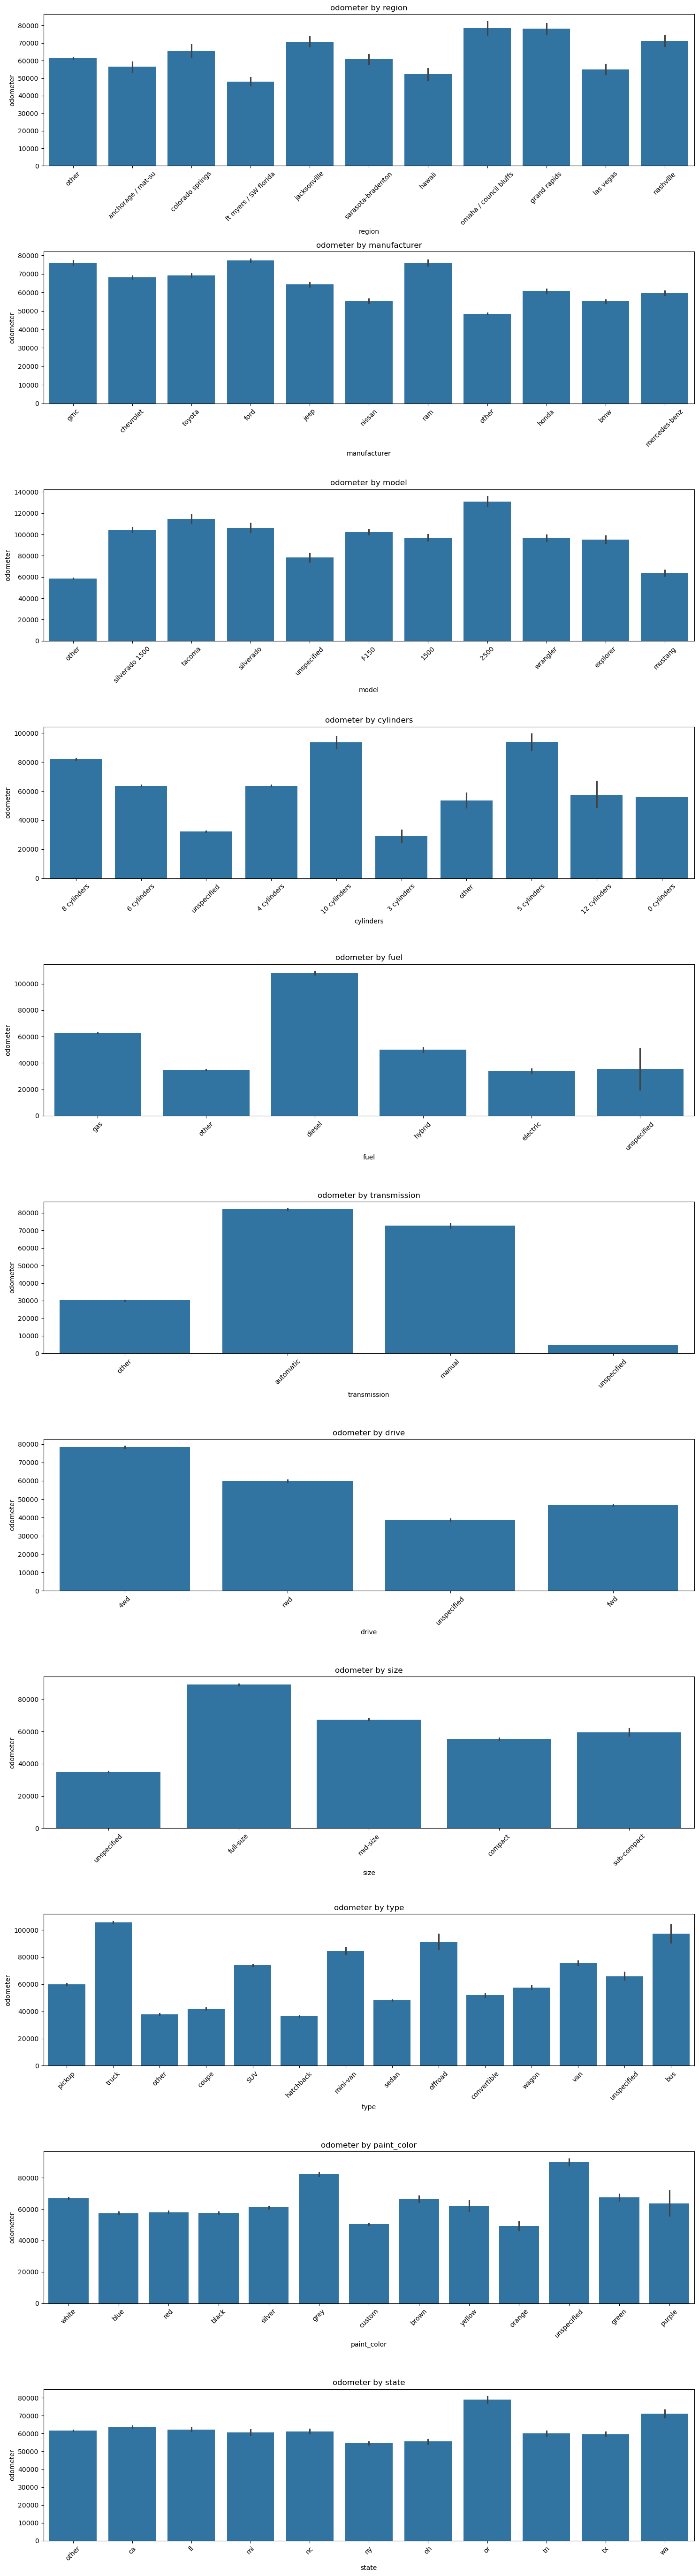

In [29]:
for i, num in enumerate(num_cols):
    print(f"Numerical Column: {num}")
    fig, axes = plt.subplots(len(nominal_cats), 1, figsize=(15, 5 * len(nominal_cats)), sharex=False, sharey=False)
    for j, cat in enumerate(nominal_cats):
        ax = axes[j]
        sns.barplot(data=visualize_data, x=cat, y=num, ax=ax, errorbar=('ci', 95))
        ax.set_title(f'{num} by {cat}')
        ax.tick_params(axis='x', rotation=45)   
    plt.tight_layout()
    plt.show()
    print("=" * 30)

#### Ordinal

Numerical Column: price


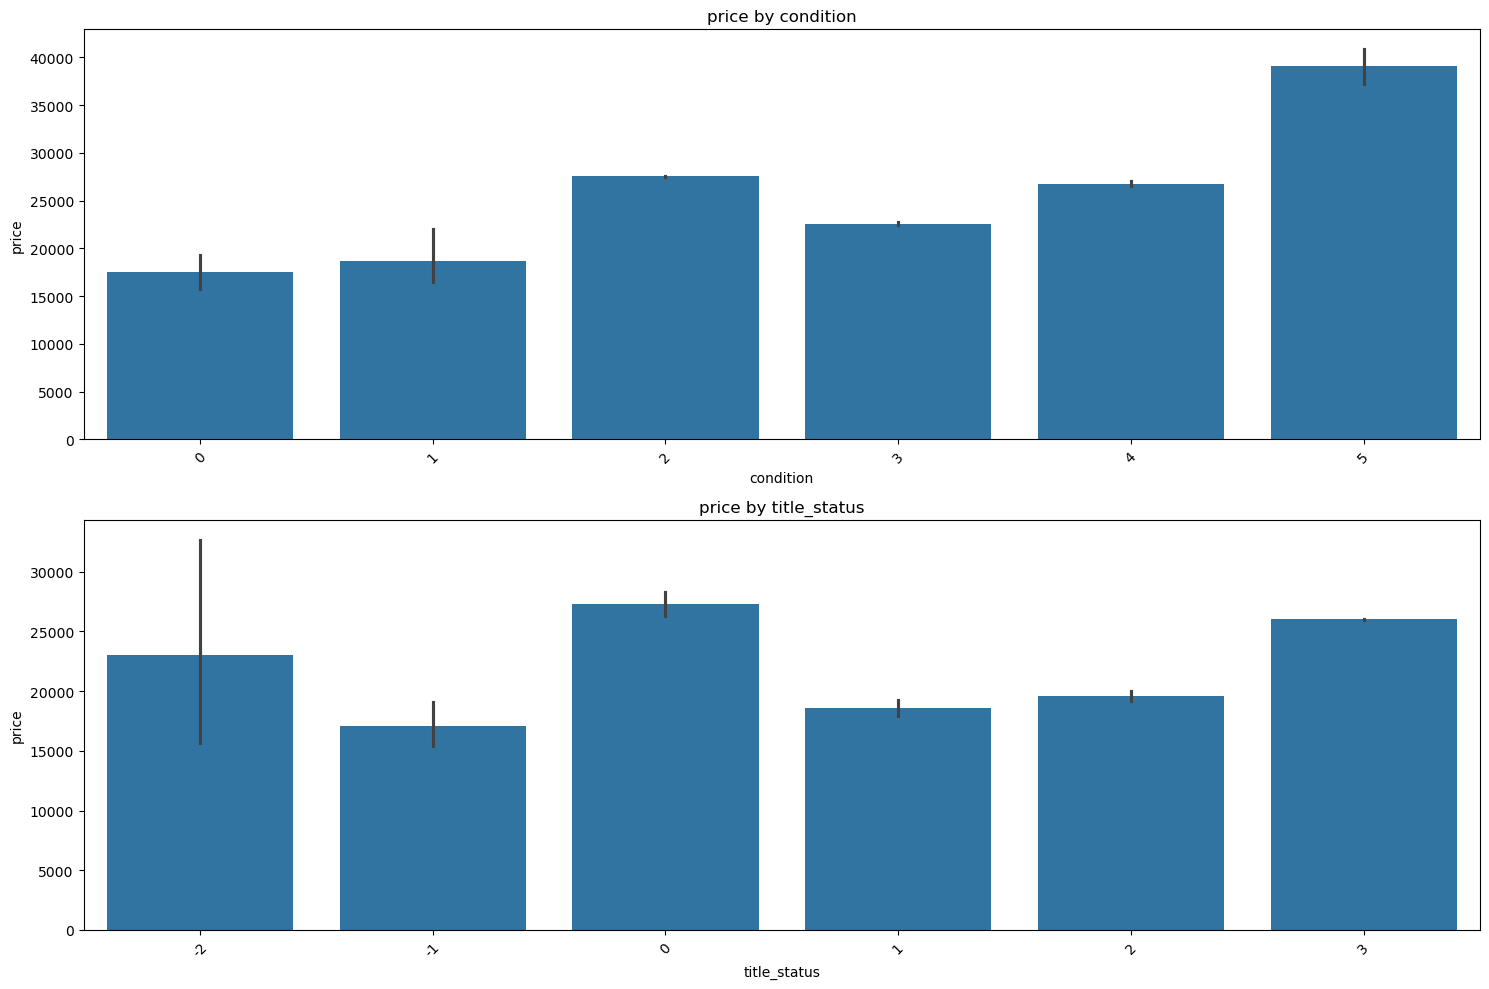

Numerical Column: year


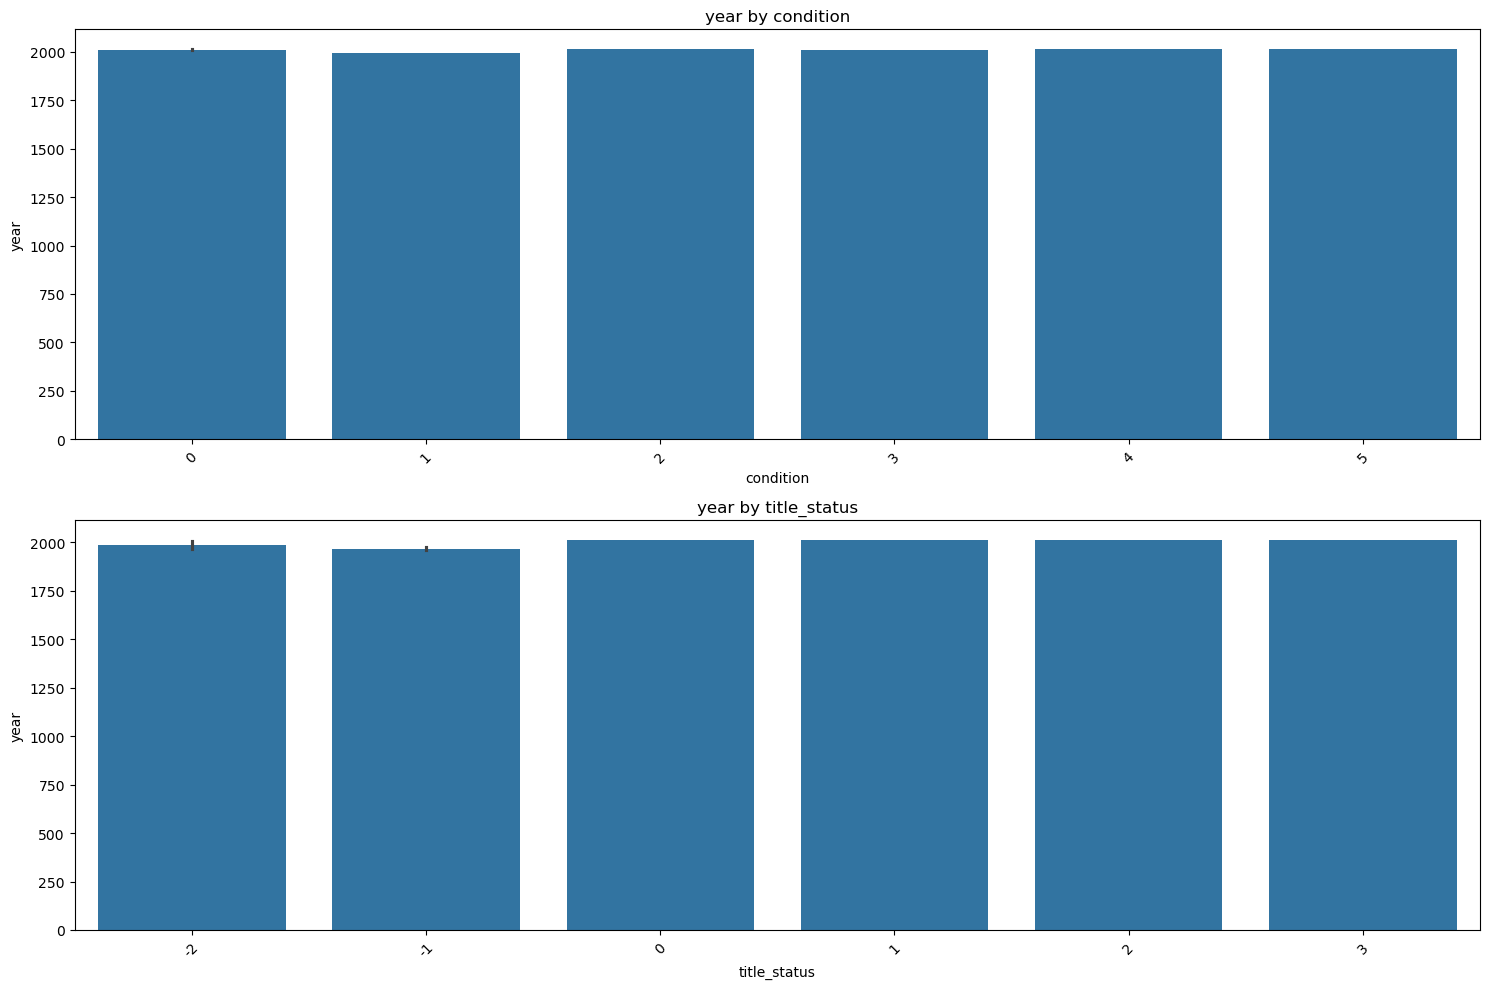

Numerical Column: odometer


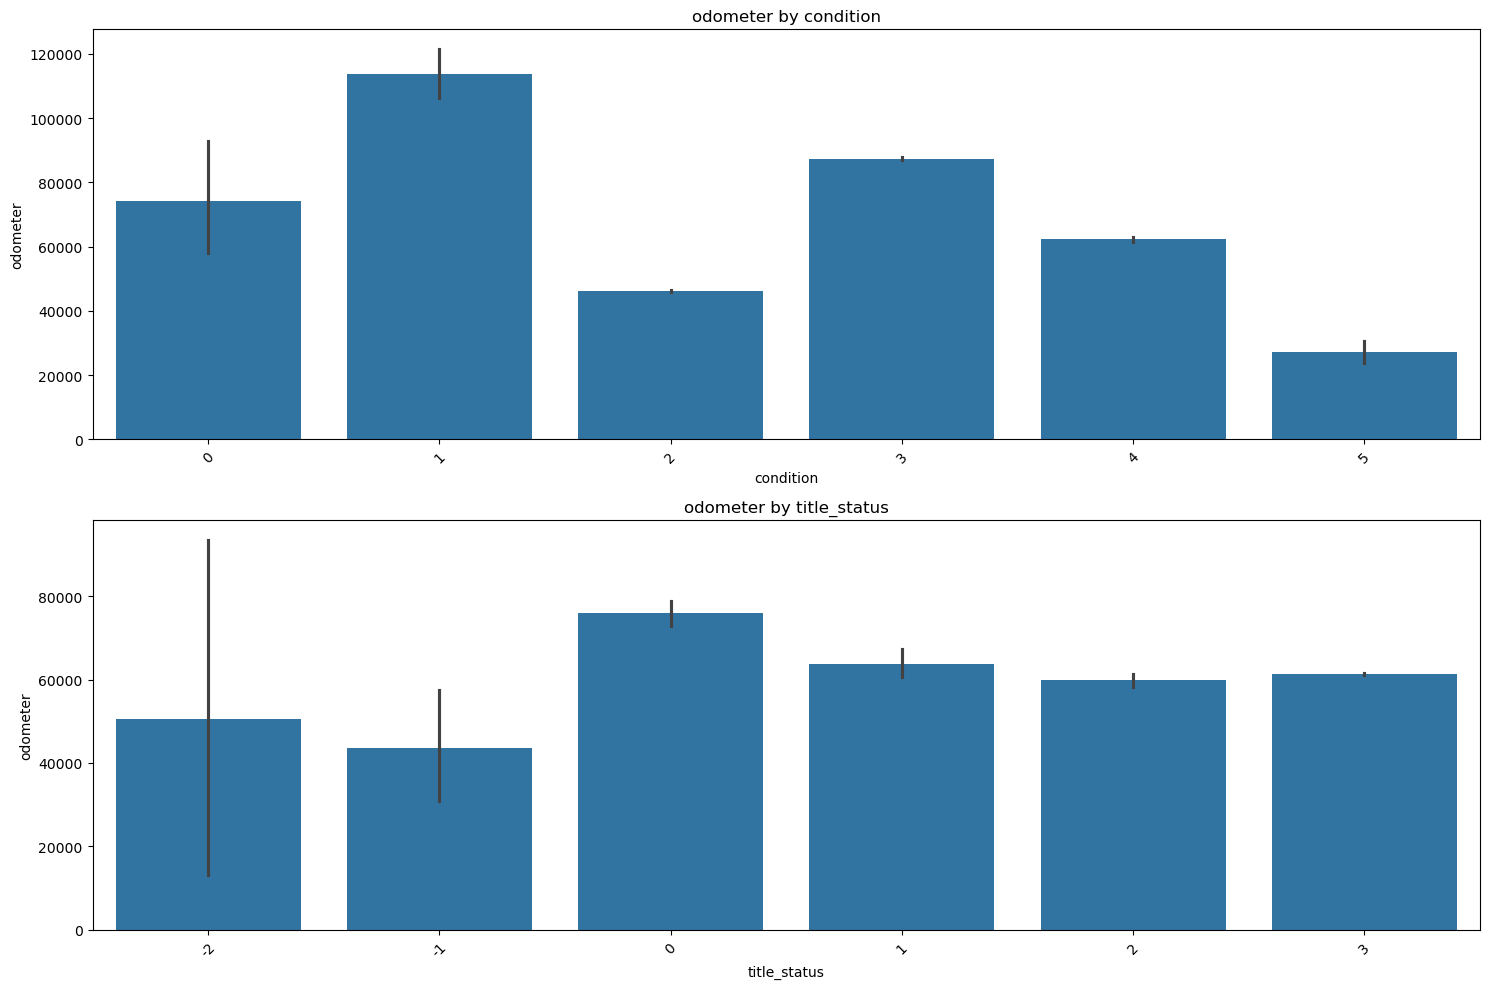

In [30]:
for i, num in enumerate(num_cols):
    print(f"Numerical Column: {num}")
    fig, axes = plt.subplots(len(ordinal_cats), 1, figsize=(15, 5 * len(ordinal_cats)), sharex=False, sharey=False)
    for j, cat in enumerate(ordinal_cats):
        ax = axes[j]
        sns.barplot(data=visualize_data, x=cat, y=num, ax=ax, errorbar=('ci', 95))
        ax.set_title(f'{num} by {cat}')
        ax.tick_params(axis='x', rotation=45)   
    plt.tight_layout()
    plt.show()
    print("=" * 30)

### Categorical - Categorical

#### Nominal - Nominal

In [31]:
print(nominal_cats)

['region', 'manufacturer', 'model', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']


In [32]:
from scipy.stats import chi2_contingency

def chi2_with_residuals(cat1, cat2, df):
    # 1) Build contingency
    obs = pd.crosstab(df[cat1], df[cat2])
    chi2, p, dof, expected = chi2_contingency(obs)

    # 2) Cramér's V
    n = obs.values.sum()
    r, c = obs.shape
    V = np.sqrt(chi2 / (n * min(r-1, c-1)))

    # 3) Standardized residuals
    std_resid = (obs - expected) / np.sqrt(expected)

    return chi2, p, dof, V, obs, std_resid

region vs manufacturer → χ²=955.4, p=1.1962334434352463e-139, dof=100, Cramér’s V=0.026
region vs model → χ²=315.9, p=3.2296666584792514e-24, dof=100, Cramér’s V=0.015
region vs cylinders → χ²=1445.0, p=4.1303368354036823e-243, dof=90, Cramér’s V=0.033
region vs fuel → χ²=503.0, p=4.2764104122444093e-76, dof=50, Cramér’s V=0.026
region vs transmission → χ²=1712.2, p=0.0, dof=30, Cramér’s V=0.062
region vs drive → χ²=1282.7, p=6.6548306352967166e-251, dof=30, Cramér’s V=0.054
region vs size → χ²=1340.8, p=3.0131656664194507e-255, dof=40, Cramér’s V=0.048
region vs type → χ²=1894.4, p=1.1437990421063e-310, dof=130, Cramér’s V=0.036
region vs paint_color → χ²=927.7, p=5.982978570116164e-125, dof=120, Cramér’s V=0.025
region vs state → χ²=116414.3, p=0.0, dof=100, Cramér’s V=0.282


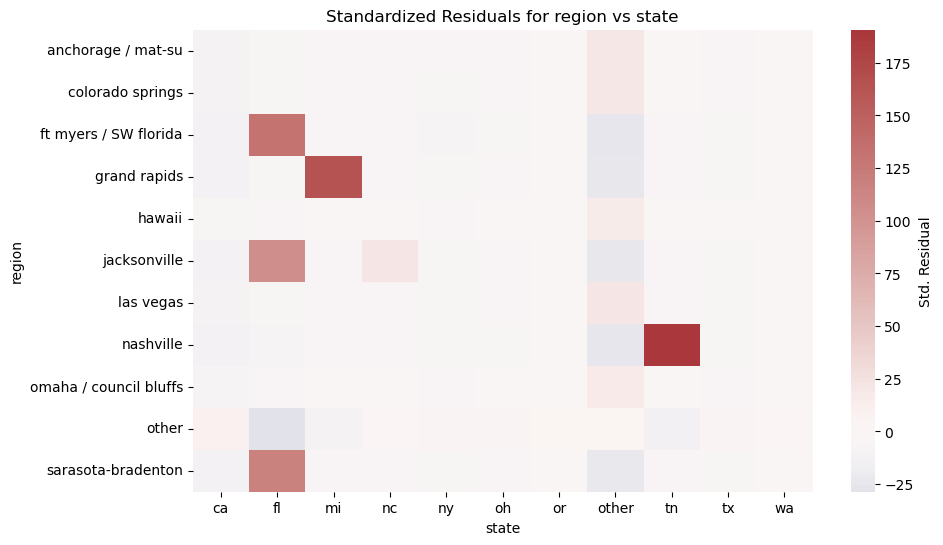

manufacturer vs model → χ²=103532.6, p=0.0, dof=100, Cramér’s V=0.266


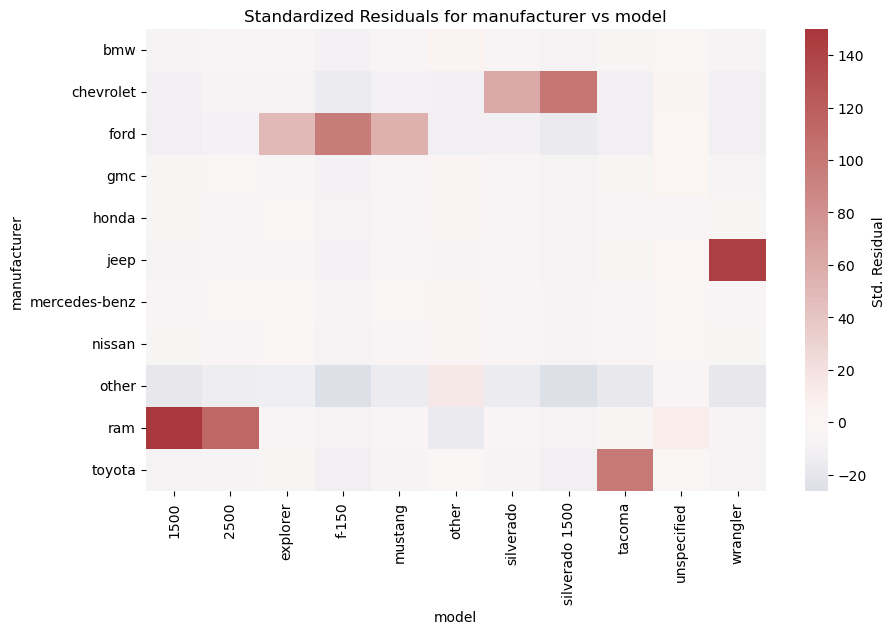

manufacturer vs cylinders → χ²=54525.8, p=0.0, dof=90, Cramér’s V=0.203


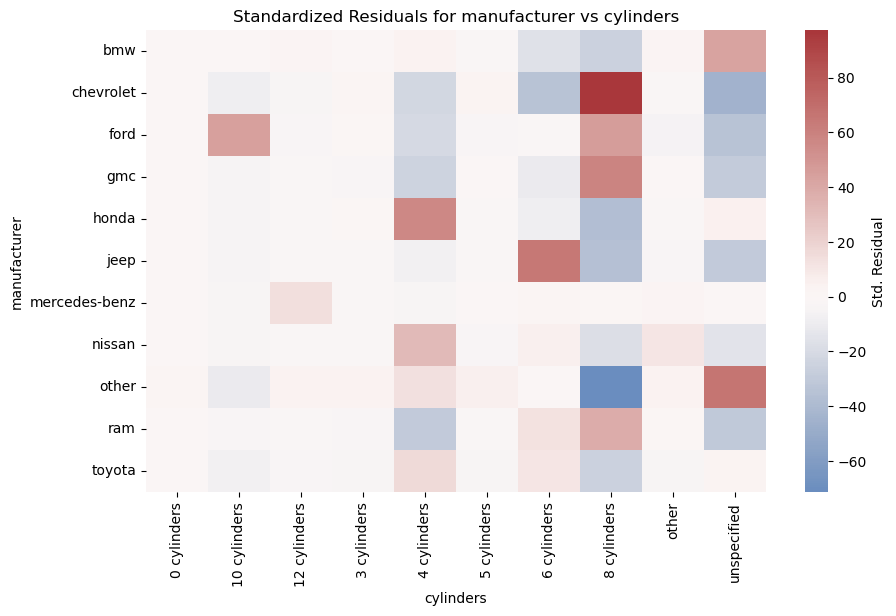

manufacturer vs fuel → χ²=12698.6, p=0.0, dof=50, Cramér’s V=0.132


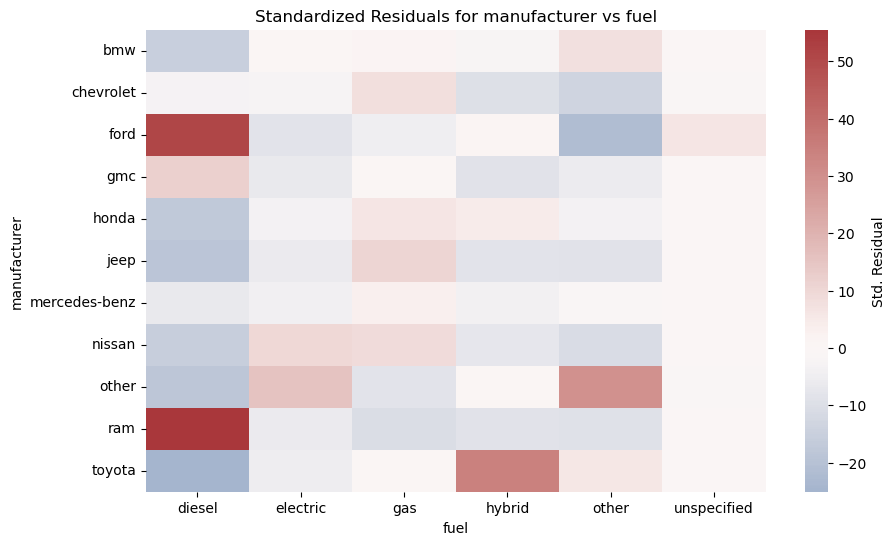

manufacturer vs transmission → χ²=7921.6, p=0.0, dof=30, Cramér’s V=0.134


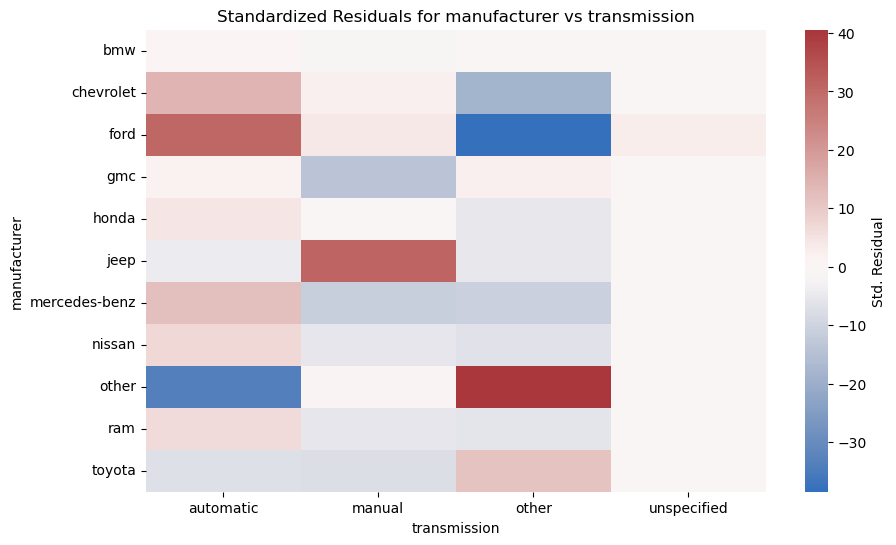

manufacturer vs drive → χ²=46130.0, p=0.0, dof=30, Cramér’s V=0.324


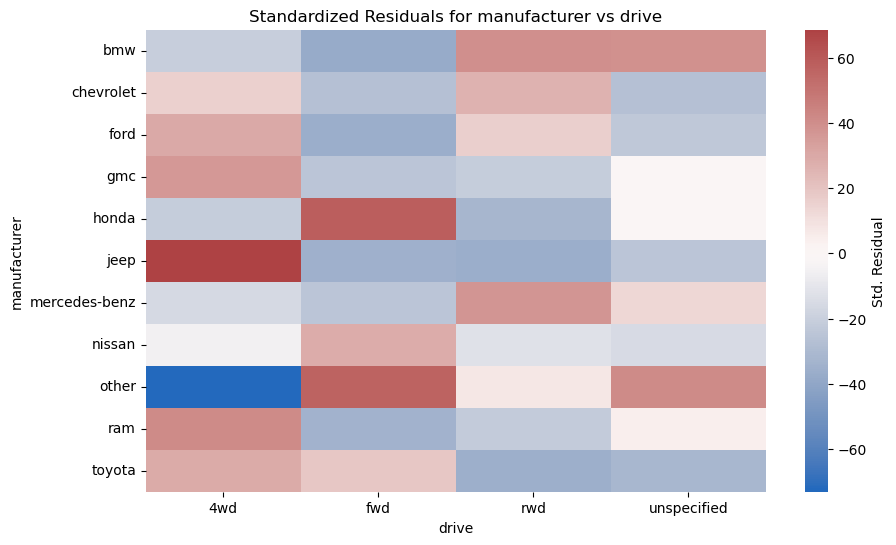

manufacturer vs size → χ²=27352.8, p=0.0, dof=40, Cramér’s V=0.216


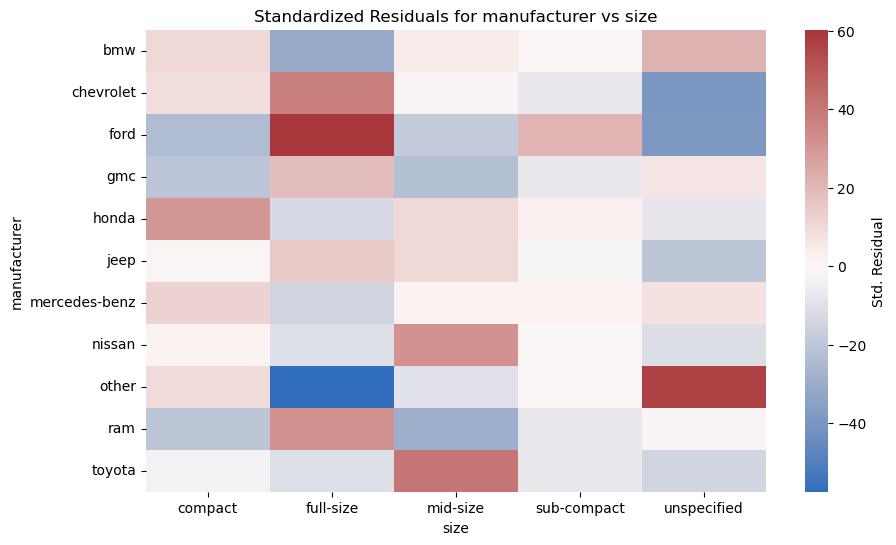

manufacturer vs type → χ²=92157.3, p=0.0, dof=130, Cramér’s V=0.251


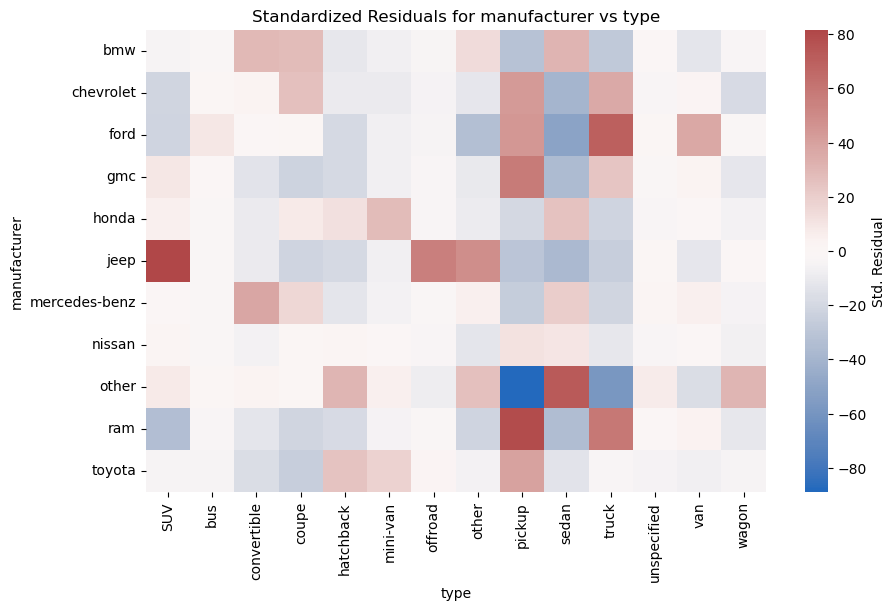

manufacturer vs paint_color → χ²=10730.6, p=0.0, dof=120, Cramér’s V=0.086
manufacturer vs state → χ²=2463.7, p=0.0, dof=100, Cramér’s V=0.041
model vs cylinders → χ²=13441.4, p=0.0, dof=90, Cramér’s V=0.101


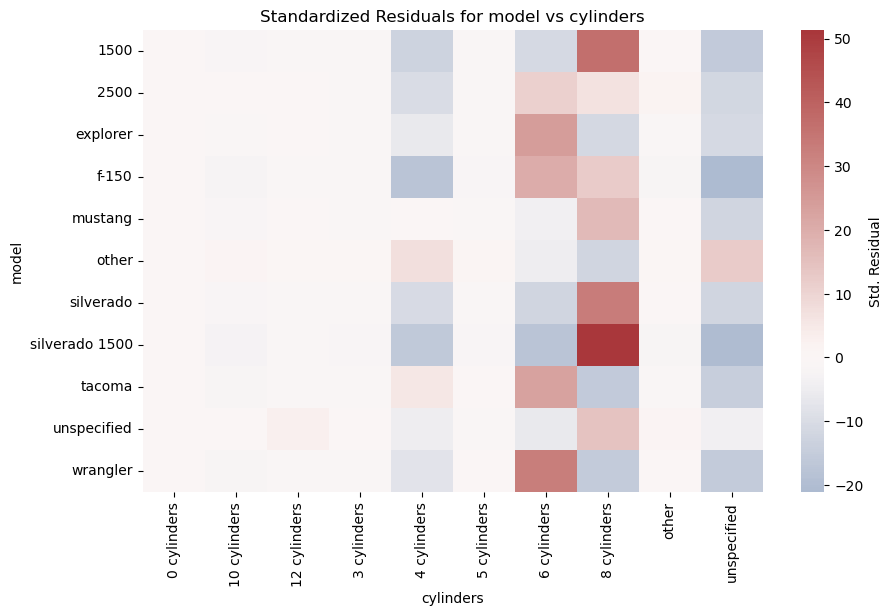

model vs fuel → χ²=5587.2, p=0.0, dof=50, Cramér’s V=0.087
model vs transmission → χ²=9921.7, p=0.0, dof=30, Cramér’s V=0.150


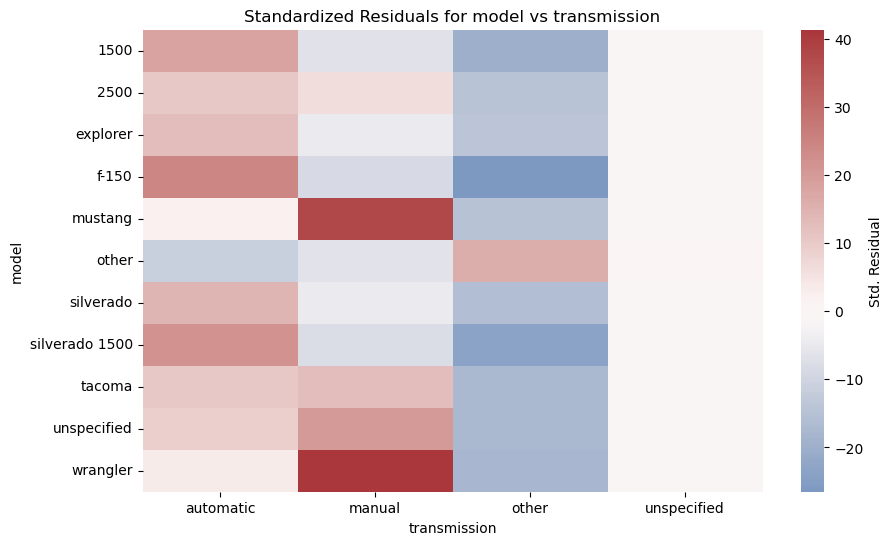

model vs drive → χ²=10557.1, p=0.0, dof=30, Cramér’s V=0.155


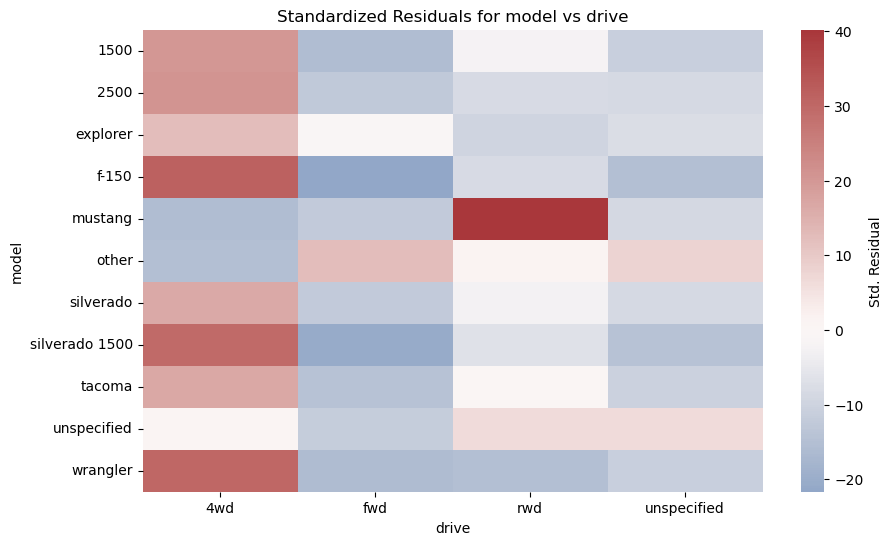

model vs size → χ²=41191.7, p=0.0, dof=40, Cramér’s V=0.265


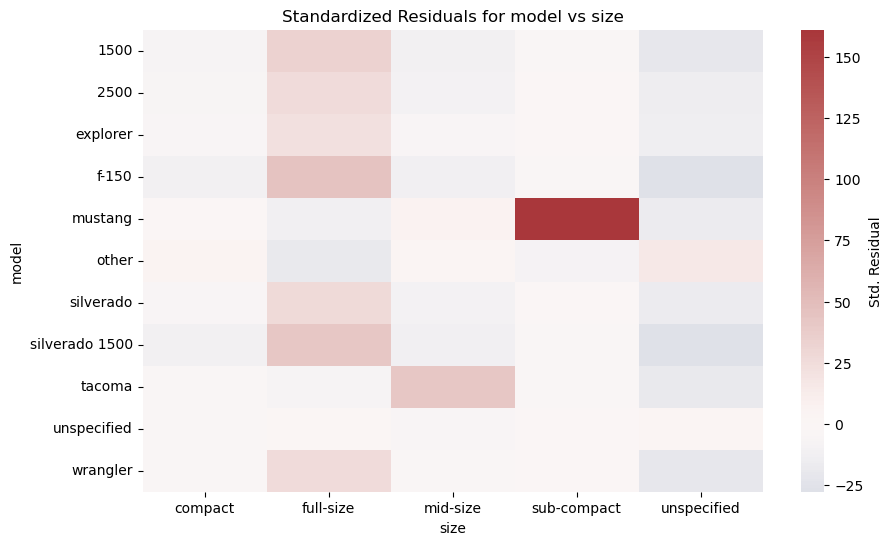

model vs type → χ²=37480.7, p=0.0, dof=130, Cramér’s V=0.160


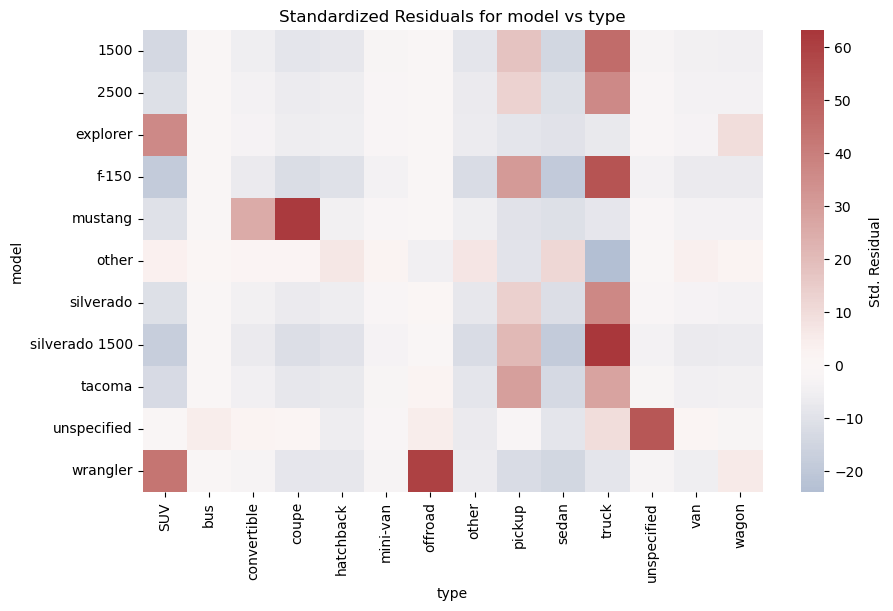

model vs paint_color → χ²=2247.9, p=0.0, dof=120, Cramér’s V=0.039
model vs state → χ²=936.2, p=6.6747830844159e-136, dof=100, Cramér’s V=0.025
cylinders vs fuel → χ²=28463.3, p=0.0, dof=45, Cramér’s V=0.197


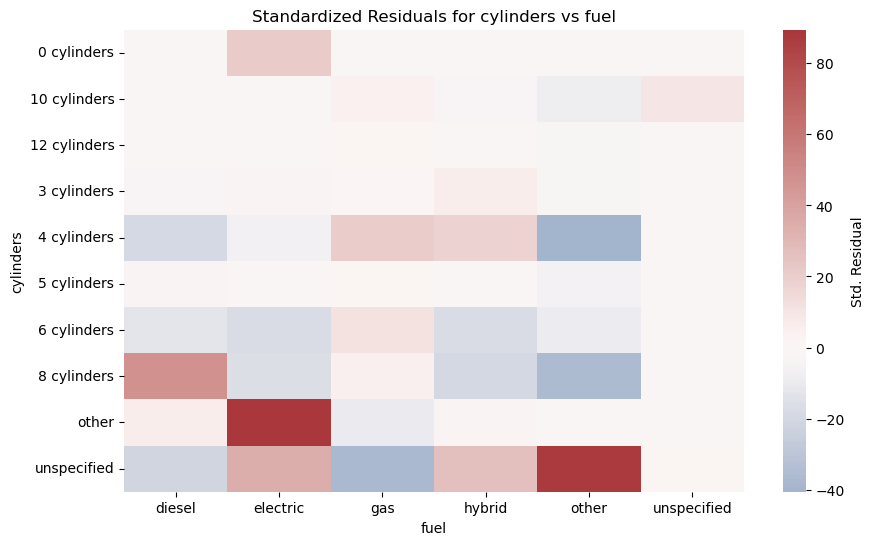

cylinders vs transmission → χ²=35888.2, p=0.0, dof=27, Cramér’s V=0.286


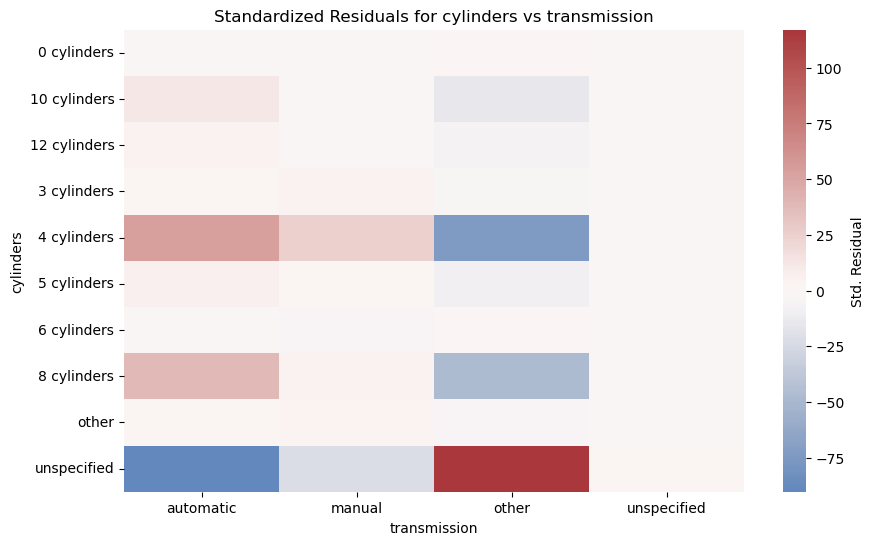

cylinders vs drive → χ²=46770.9, p=0.0, dof=27, Cramér’s V=0.326


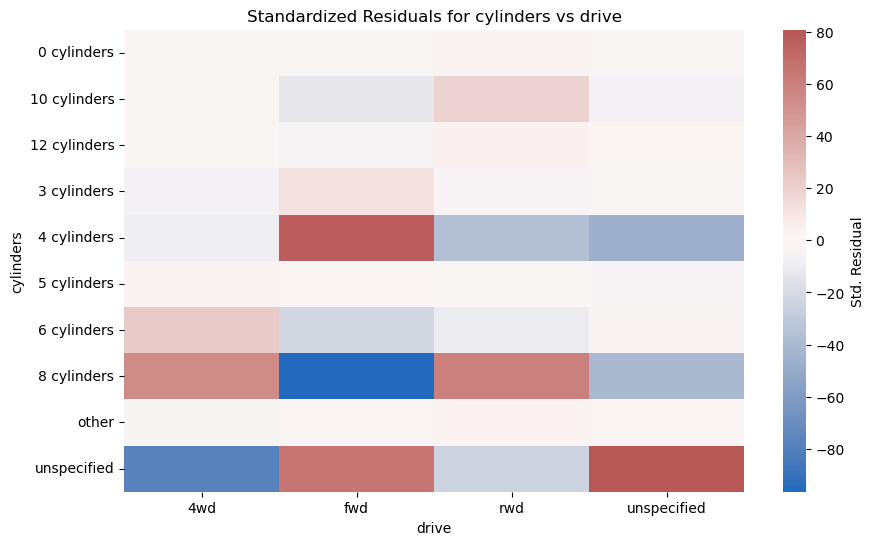

cylinders vs size → χ²=72883.1, p=0.0, dof=36, Cramér’s V=0.353


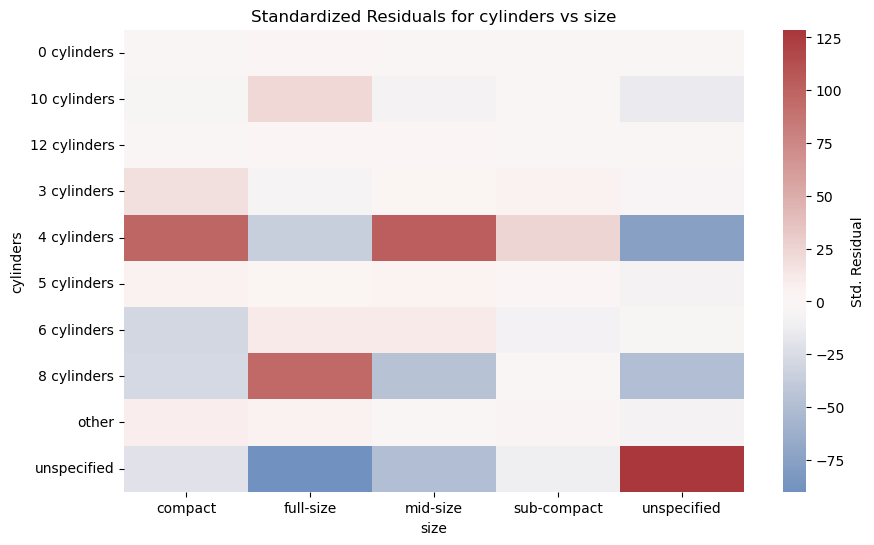

cylinders vs type → χ²=66764.0, p=0.0, dof=117, Cramér’s V=0.225


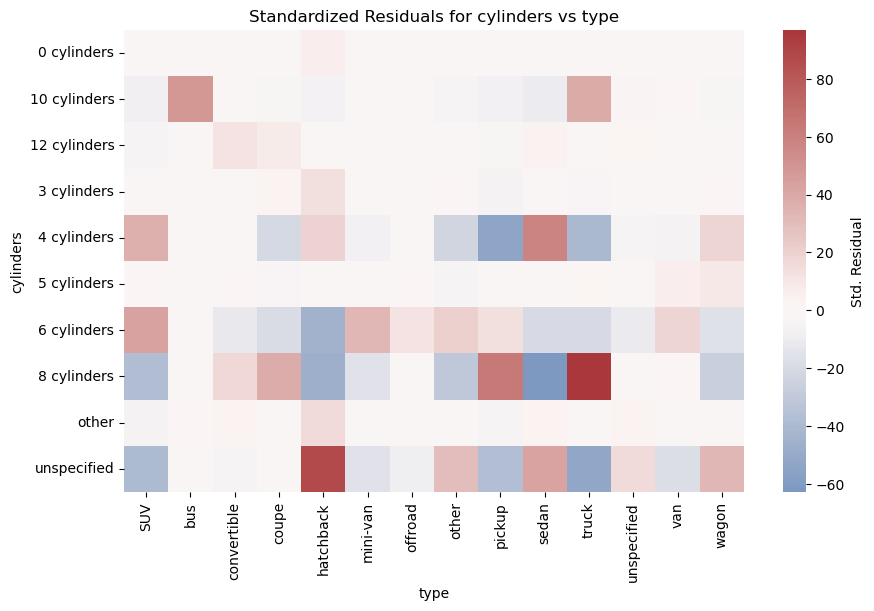

cylinders vs paint_color → χ²=7688.2, p=0.0, dof=108, Cramér’s V=0.076
cylinders vs state → χ²=2163.4, p=0.0, dof=90, Cramér’s V=0.041
fuel vs transmission → χ²=60636.7, p=0.0, dof=15, Cramér’s V=0.372


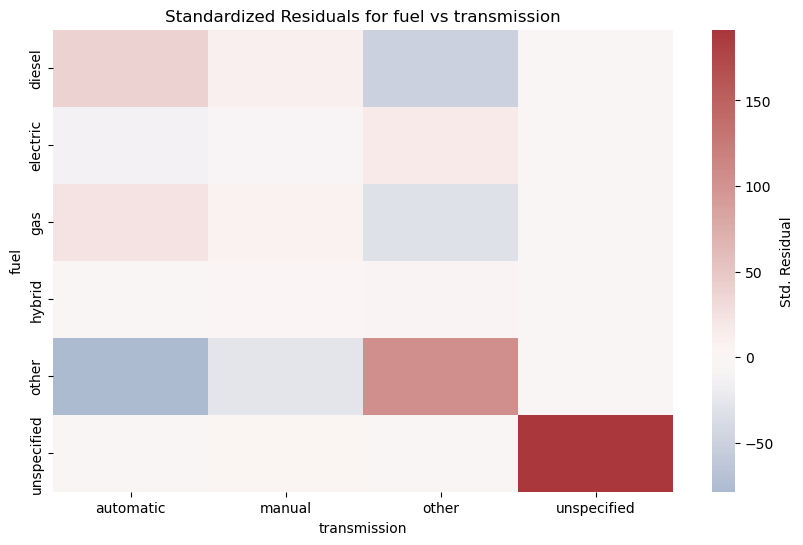

fuel vs drive → χ²=9259.2, p=0.0, dof=15, Cramér’s V=0.145


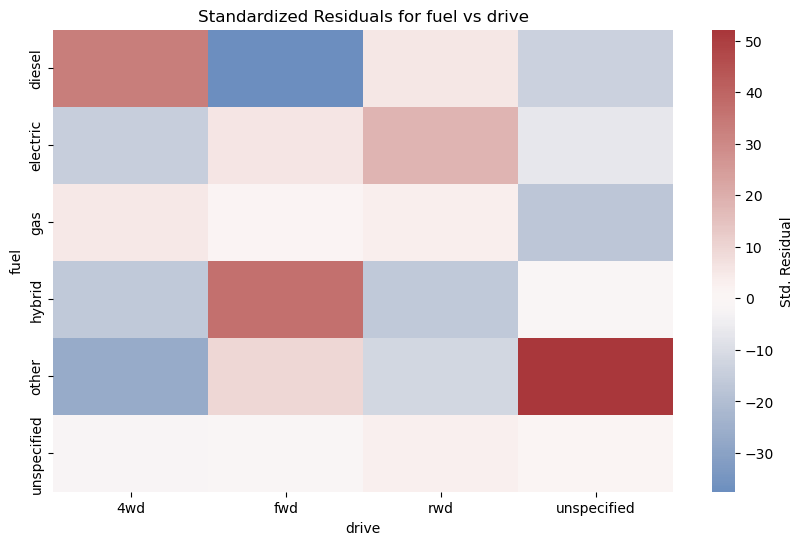

fuel vs size → χ²=20439.8, p=0.0, dof=20, Cramér’s V=0.187


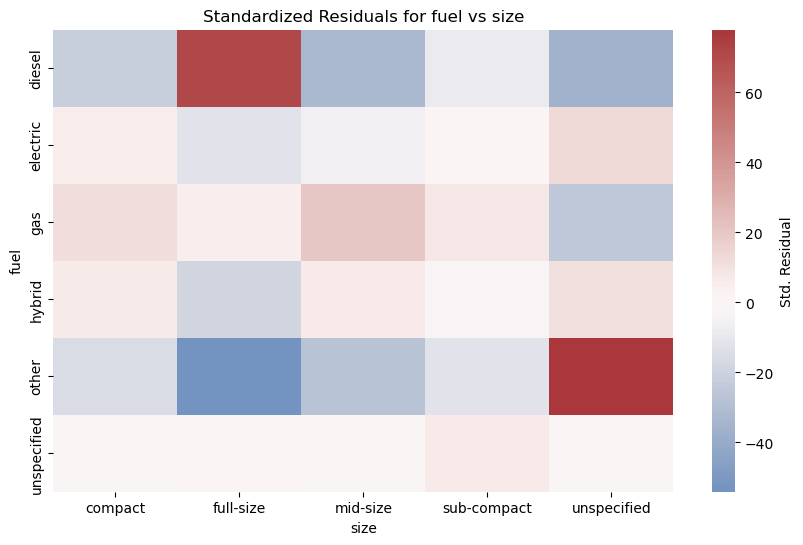

fuel vs type → χ²=37740.5, p=0.0, dof=65, Cramér’s V=0.227


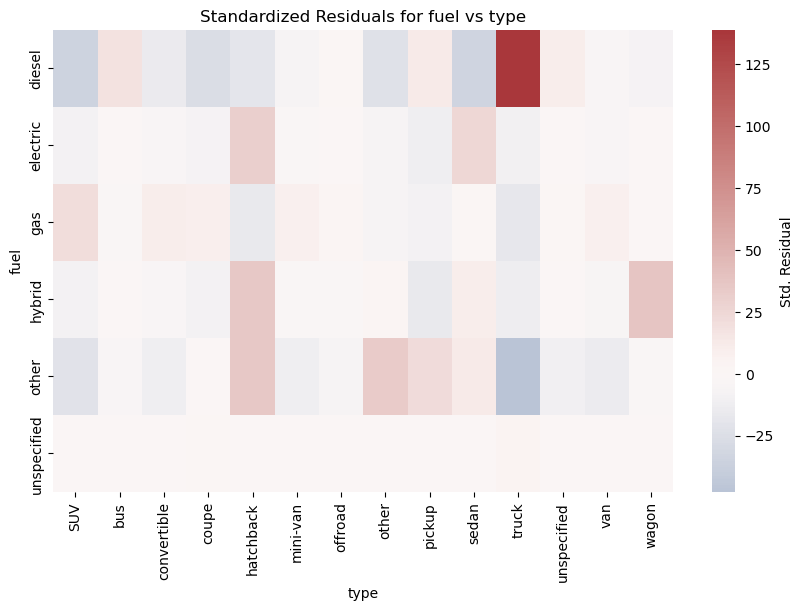

fuel vs paint_color → χ²=6749.6, p=0.0, dof=60, Cramér’s V=0.096
fuel vs state → χ²=1077.8, p=5.518296783436828e-193, dof=50, Cramér’s V=0.038
transmission vs drive → χ²=13311.5, p=0.0, dof=9, Cramér’s V=0.174


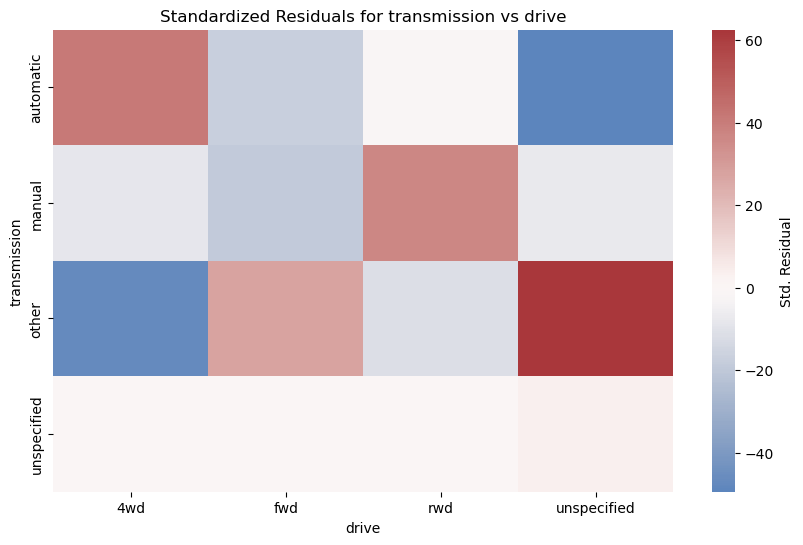

transmission vs size → χ²=64010.2, p=0.0, dof=12, Cramér’s V=0.382


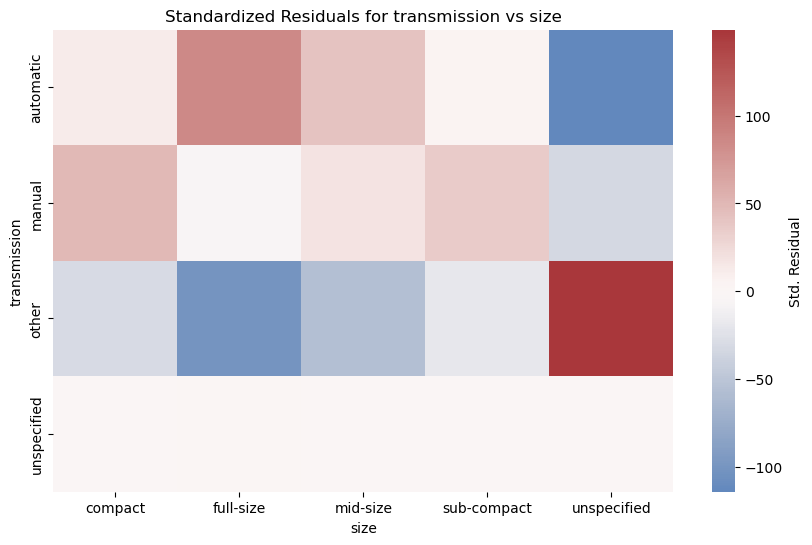

transmission vs type → χ²=41141.7, p=0.0, dof=39, Cramér’s V=0.306


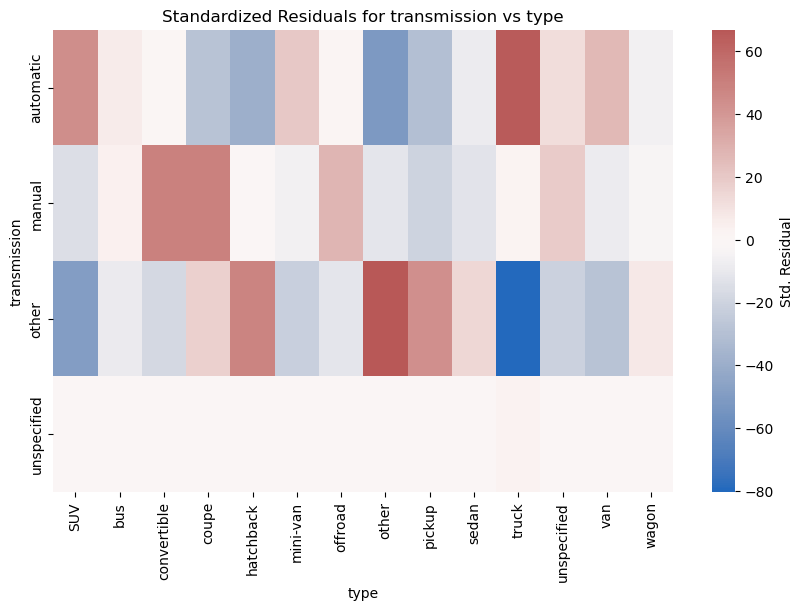

transmission vs paint_color → χ²=10280.0, p=0.0, dof=36, Cramér’s V=0.153


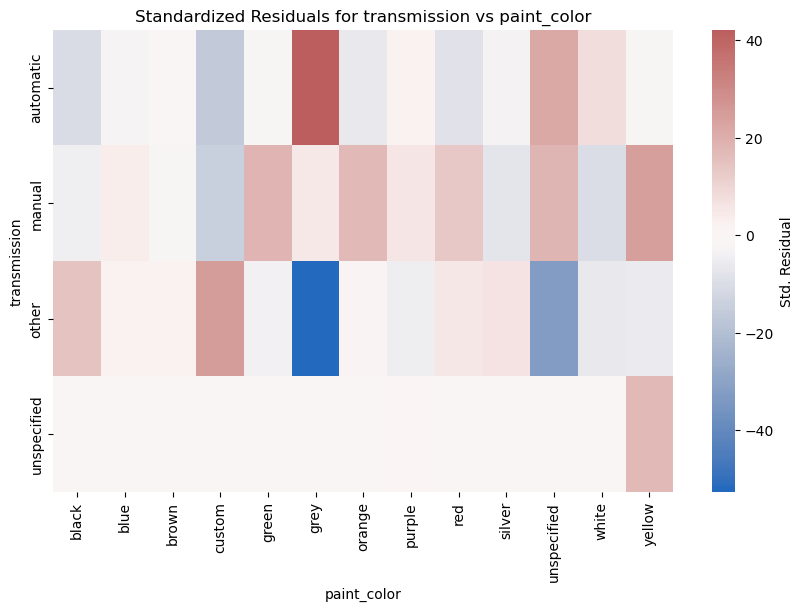

transmission vs state → χ²=2311.2, p=0.0, dof=30, Cramér’s V=0.073
drive vs size → χ²=33268.7, p=0.0, dof=12, Cramér’s V=0.275


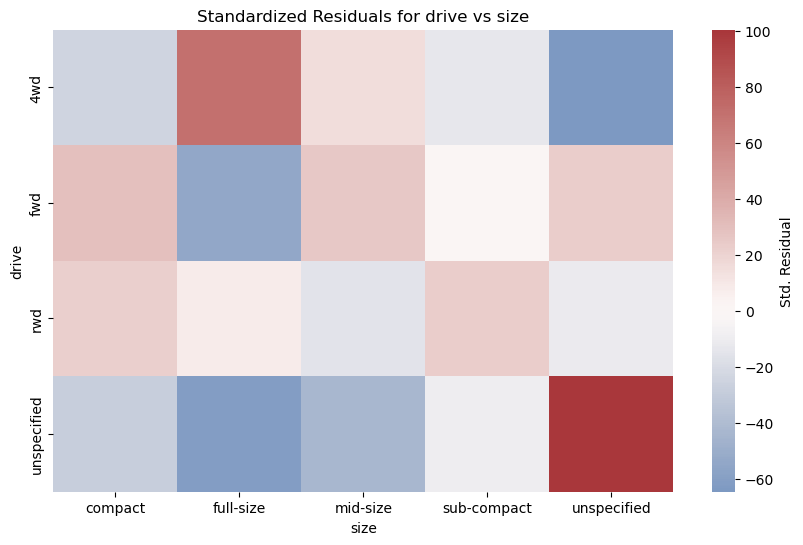

drive vs type → χ²=89731.2, p=0.0, dof=39, Cramér’s V=0.452


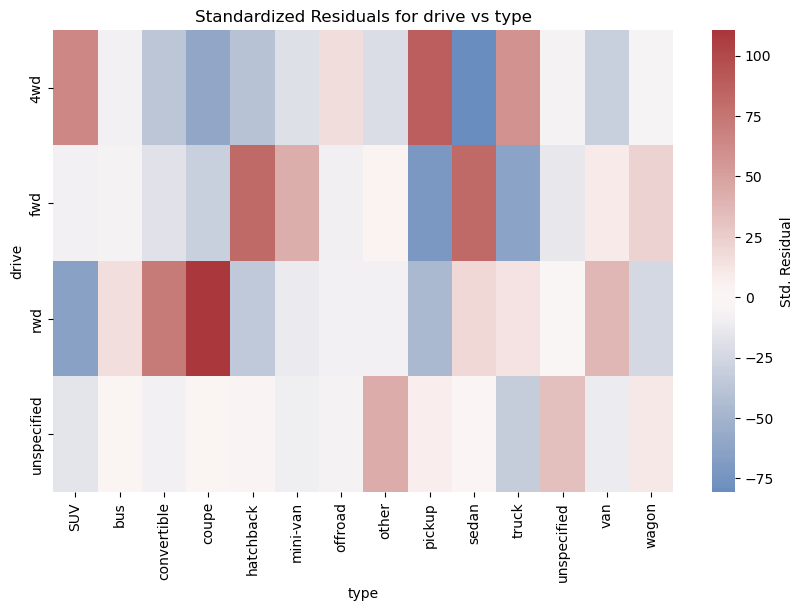

drive vs paint_color → χ²=5629.2, p=0.0, dof=36, Cramér’s V=0.113


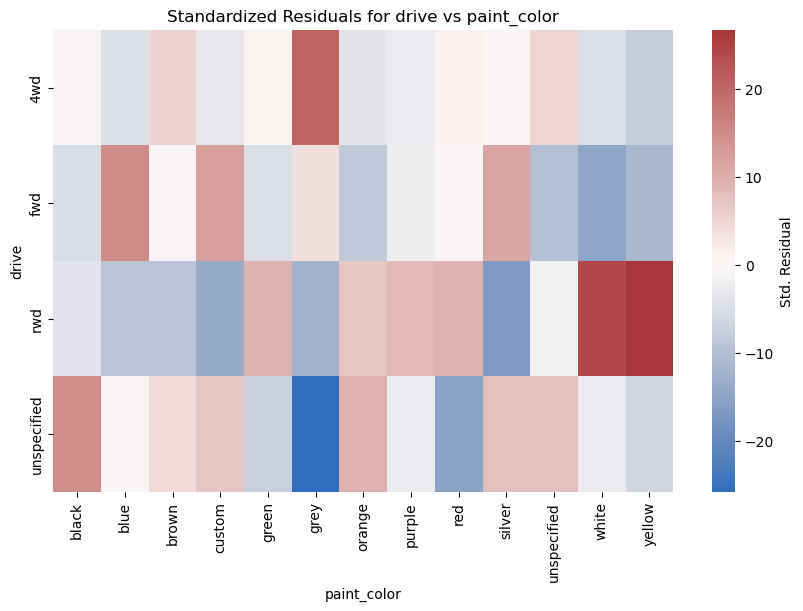

drive vs state → χ²=2920.3, p=0.0, dof=30, Cramér’s V=0.082
size vs type → χ²=51416.5, p=0.0, dof=52, Cramér’s V=0.296


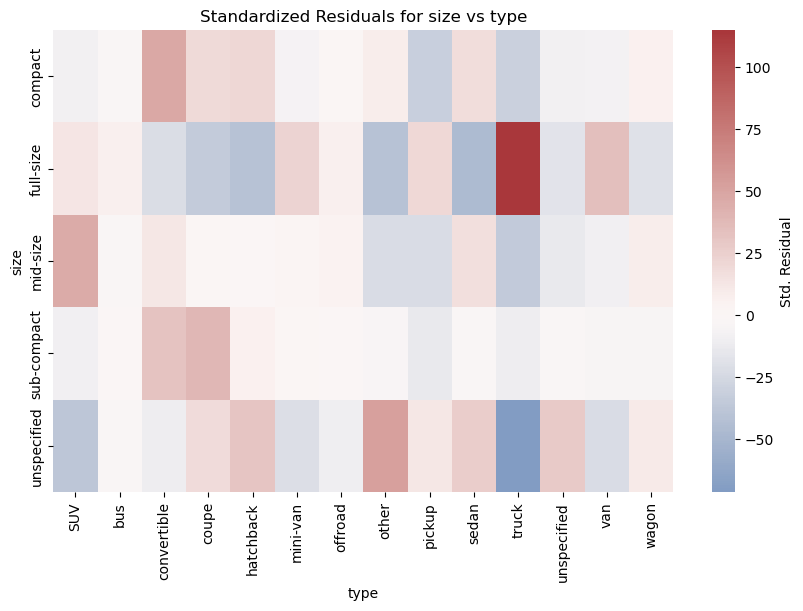

size vs paint_color → χ²=8573.2, p=0.0, dof=48, Cramér’s V=0.121


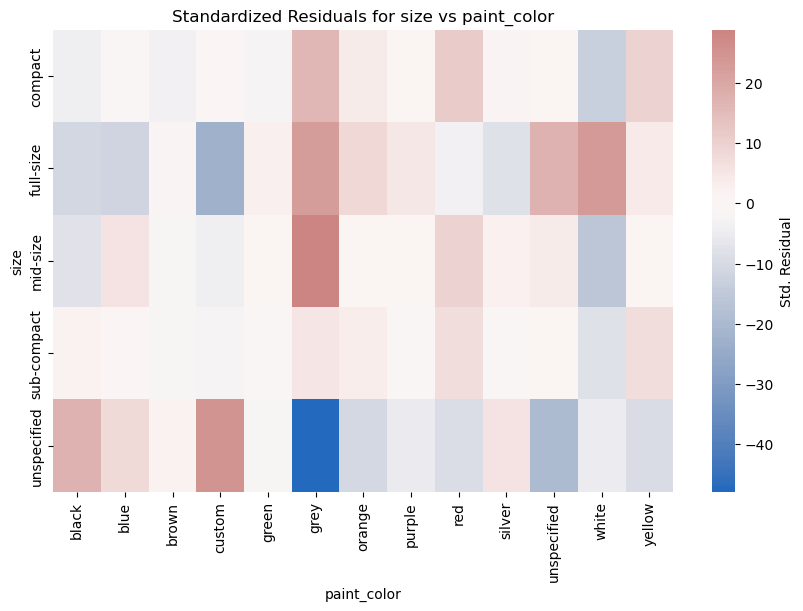

size vs state → χ²=1977.0, p=0.0, dof=40, Cramér’s V=0.058
type vs paint_color → χ²=18931.9, p=0.0, dof=156, Cramér’s V=0.104


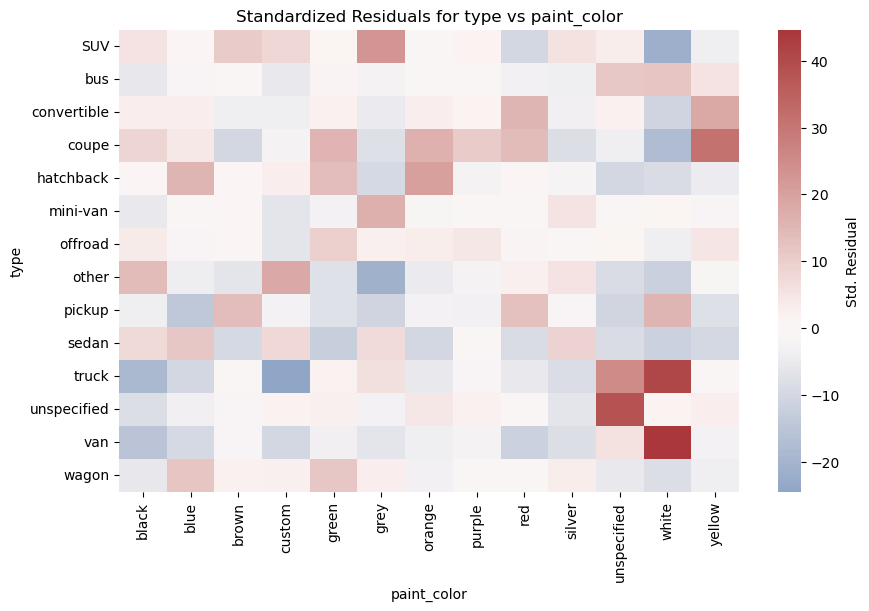

type vs state → χ²=2459.7, p=0.0, dof=130, Cramér’s V=0.041
paint_color vs state → χ²=1992.2, p=0.0, dof=120, Cramér’s V=0.037


In [33]:
for i in range(len(nominal_cats)):
    for j in range(i+1, len(nominal_cats)):
        col1, col2 = nominal_cats[i], nominal_cats[j]
        chi2, p, dof, V, obs, std_resid = chi2_with_residuals(col1, col2, visualize_data)

        print(f"{col1} vs {col2} → χ²={chi2:.1f}, p={p}, dof={dof}, Cramér’s V={V:.3f}")
        if V >= 0.1:
            plt.figure(figsize=(10,6))
            sns.heatmap(
                std_resid,
                cmap='vlag',
                center=0,
                annot=False,
                cbar_kws={'label': 'Std. Residual'}
            )
            plt.title(f"Standardized Residuals for {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()

#### Nominal - Ordinal

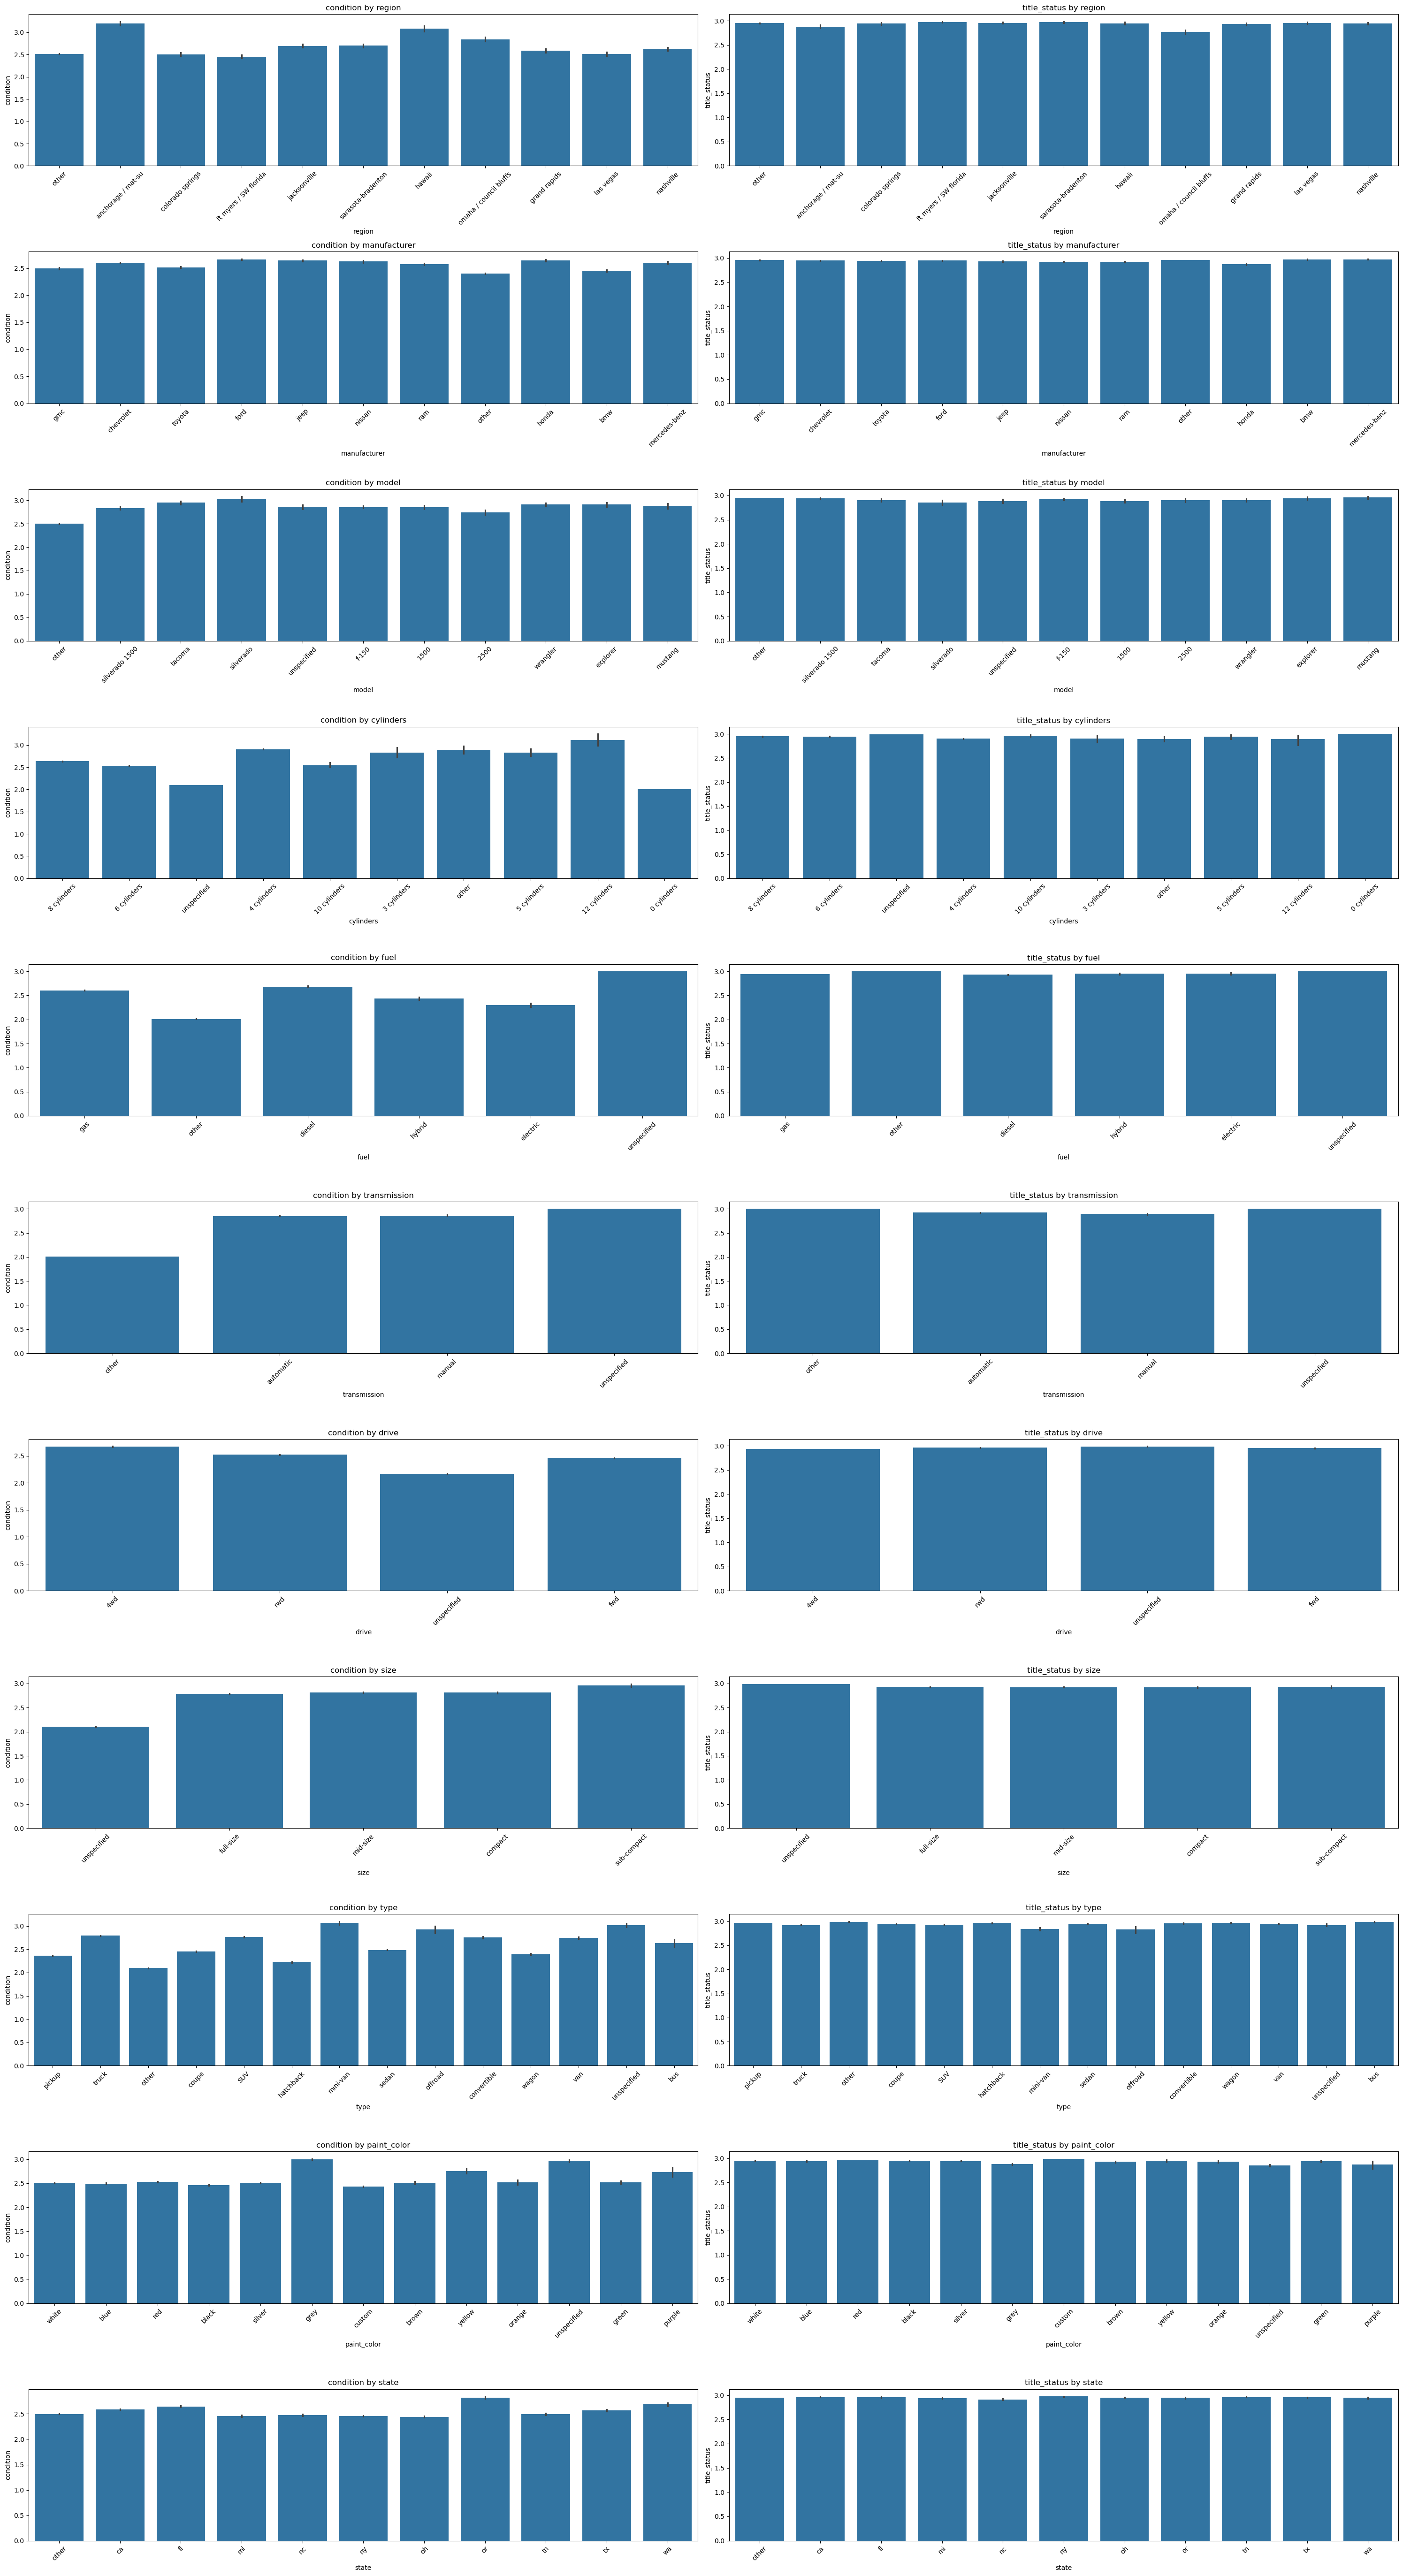

In [34]:
fig, axes = plt.subplots(len(nominal_cats), len(ordinal_cats), figsize=(15 * len(ordinal_cats), 5 * len(nominal_cats)), sharex=False, sharey=False)

for i, nominal_cat in enumerate(nominal_cats):
    for j, ordinal_cat in enumerate(ordinal_cats):
        ax = axes[i, j]
        sns.barplot(data=visualize_data, x=nominal_cat, y=ordinal_cat, ax=ax, errorbar=('ci', 95))
        ax.set_title(f'{ordinal_cat} by {nominal_cat}')
        ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

#### Ordinal - Ordinal

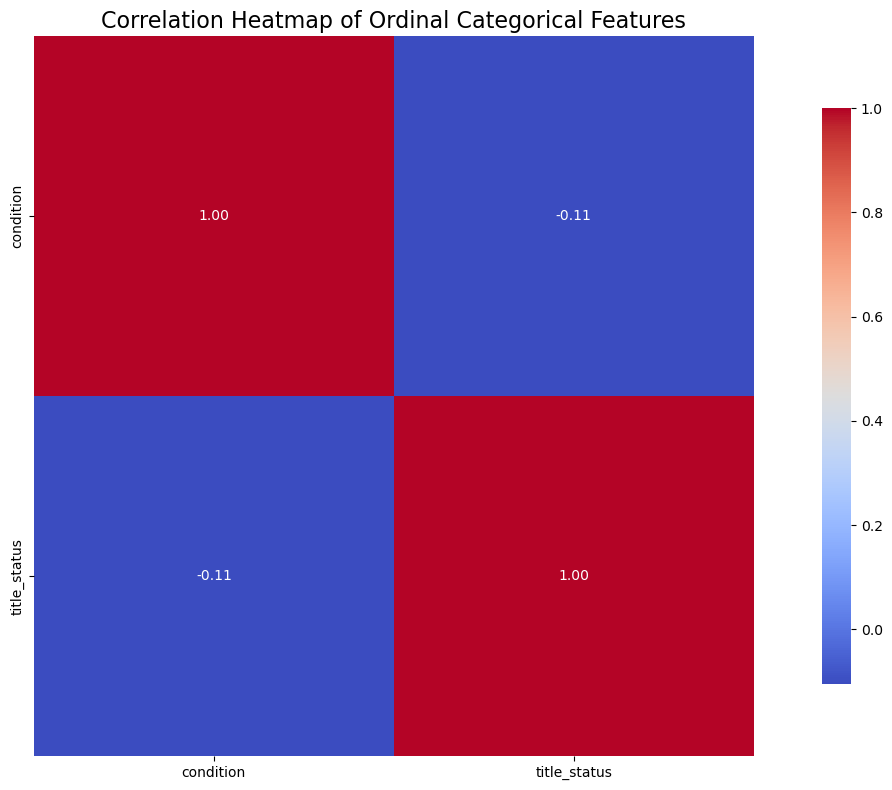

In [35]:
plt.figure(figsize=(14, 8))
sns.heatmap(visualize_data[ordinal_cats].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Ordinal Categorical Features', fontsize=16)
plt.tight_layout()
plt.show()